# AllLife Bank Project

OBJECTIVE:
1. To predict whether a liability customer will buy a personal loan or not
2. Which variables are the most significant
3. Which segment of customers should be targeted more

DATA DICTIONARY:

* ID: Customer ID 
* Age: Customer’s age in completed years 
* Experience: #years of professional experience 
* Income: Annual income of the customer (in thousand dollars) 
* ZIP Code: Home Address ZIP code. 
* Family: the Family size of the customer 
* CCAvg: Average spending on credit cards per month (in thousand dollars) 
* Education: Education Level. 1: Undergrad; 2: Graduate;3: Advanced/Professional 
* Mortgage: Value of house mortgage if any. (in thousand dollars) 
* Personal_Loan: Did this customer accept the personal loan offered in the last campaign? 0: No; 1: Yes
* Securities_Account: Does the customer have securities account with the bank? 0: No; 1: Yes 
* CD_Account: Does the customer have a certificate of deposit (CD) account with the bank? 0: No; 1: Yes 
* Online: Do customers use internet banking facilities? 0: Doesn't use; 1: Does use 
* CreditCard: Does the customer use a credit card issued by any other Bank (excluding All life Bank)? 0: No; 1: Yes

## Import necessary libraries: 

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from PIL import Image
import warnings
warnings.filterwarnings('ignore')
sns.set(color_codes=True)
%matplotlib inline 
from scipy.stats import ttest_1samp, wilcoxon
from statsmodels.stats.power import ttest_power
from scipy.stats import ttest_ind
from sklearn.preprocessing import LabelEncoder
from scipy.stats import chi2_contingency
from statsmodels.stats.multicomp import pairwise_tukeyhsd, MultiComparison
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn import metrics

In [2]:
bank = pd.read_csv ('Loan_Modelling.csv')
bank.head()

,ID,Age,Experience,Income,ZIPCode,Family,CCAvg,Education,Mortgage,Personal_Loan,Securities_Account,CD_Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


## Check the shape of the data and the type: 

In [3]:
print(f'There are {bank.shape[0]} rows and {bank.shape[1]} columns.')

There are 5000 rows and 14 columns.


In [4]:
bank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  5000 non-null   int64  
 1   Age                 5000 non-null   int64  
 2   Experience          5000 non-null   int64  
 3   Income              5000 non-null   int64  
 4   ZIPCode             5000 non-null   int64  
 5   Family              5000 non-null   int64  
 6   CCAvg               5000 non-null   float64
 7   Education           5000 non-null   int64  
 8   Mortgage            5000 non-null   int64  
 9   Personal_Loan       5000 non-null   int64  
 10  Securities_Account  5000 non-null   int64  
 11  CD_Account          5000 non-null   int64  
 12  Online              5000 non-null   int64  
 13  CreditCard          5000 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 547.0 KB


## Check which columns have the most missing values: 

In [5]:
bank.isnull().sum().sort_values(ascending=False) #By using "false", the first values displayed contain the greatest number of missing values

CreditCard            0
Online                0
CD_Account            0
Securities_Account    0
Personal_Loan         0
Mortgage              0
Education             0
CCAvg                 0
Family                0
ZIPCode               0
Income                0
Experience            0
Age                   0
ID                    0
dtype: int64

## Statistical summary: 

In [6]:
bank.describe().T #Summary for reference

,count,mean,std,min,25%,50%,75%,max
ID,5000.0,2500.500000,1443.520003,1.0,1250.75,2500.5,3750.25,5000.0
Age,5000.0,45.338400,11.463166,23.0,35.00,45.0,55.00,67.0
Experience,5000.0,20.104600,11.467954,-3.0,10.00,20.0,30.00,43.0
Income,5000.0,73.774200,46.033729,8.0,39.00,64.0,98.00,224.0
ZIPCode,5000.0,93169.257000,1759.455086,90005.0,91911.00,93437.0,94608.00,96651.0
Family,5000.0,2.396400,1.147663,1.0,1.00,2.0,3.00,4.0
CCAvg,5000.0,1.937938,1.747659,0.0,0.70,1.5,2.50,10.0
Education,5000.0,1.881000,0.839869,1.0,1.00,2.0,3.00,3.0
Mortgage,5000.0,56.498800,101.713802,0.0,0.00,0.0,101.00,635.0
Personal_Loan,5000.0,0.096000,0.294621,0.0,0.00,0.0,0.00,1.0


OBSERVATIONS:

* All of the columns are either an integer or a float. 
* There do not appear to be any columns with missing values.
* ID column appears to be just a numeric customer reference number. We will check for the number of unique values to confirm.
* The Age mean is 43 years old with an age range of 23 to 67.
* The Experience min is a negative number. That will need to be addressed.
* Income column has a significant disparity between min and max values.
* ZIPCode column should be evaluated to see how many unique values we have and possibly group them by regions to provide a more indepth analysis.
* Family column shows the range to be from 1 to 4 with the mean a little over 2.
* CCAvg has a mean and max amounts that suggest skewed data. However, the min value is 0 which I feel is reasonable.
* Education mean falls right at a 2 or graduate level. Does not appear there is anyone with less than an undergraduate degree.
* Mortgage column has 0 for min, 25% and 50% but then much higher than the mean values for 75% and max. 
* It does not appear than many of those offered a personal loan accepted in the last campaign.
* We need to look at the dispersion of Securities_Account, CD_Account, Online and CreditCard columns to get a better understanding of the data. 

## Unique values by column: 

In [7]:
bank.nunique()

ID                    5000
Age                     45
Experience              47
Income                 162
ZIPCode                467
Family                   4
CCAvg                  108
Education                3
Mortgage               347
Personal_Loan            2
Securities_Account       2
CD_Account               2
Online                   2
CreditCard               2
dtype: int64

OBSERVATIONS:

* ID has 5000 unique values so that appears to be a numeric customer reference number.
* Income, ZIPCode, CCAvg, and Mortgage have a significant number of unique values. We might try to address this for better analysis.

### Check counts of unique values: 

In [8]:
bank["Age"].value_counts()

35    151
43    149
52    145
58    143
54    143
50    138
41    136
30    136
56    135
34    134
39    133
59    132
57    132
51    129
60    127
45    127
46    127
42    126
40    125
31    125
55    125
62    123
29    123
61    122
44    121
32    120
33    120
48    118
38    115
49    115
47    113
53    112
63    108
36    107
37    106
28    103
27     91
65     80
64     78
26     78
25     53
24     28
66     24
23     12
67     12
Name: Age, dtype: int64

In [9]:
bank["Income"].value_counts()

44     85
38     84
81     83
41     82
39     81
       ..
189     2
202     2
205     2
224     1
218     1
Name: Income, Length: 162, dtype: int64

In [10]:
bank["CCAvg"].value_counts()

0.30    241
1.00    231
0.20    204
2.00    188
0.80    187
       ... 
2.75      1
8.20      1
9.30      1
3.67      1
5.33      1
Name: CCAvg, Length: 108, dtype: int64

In [11]:
bank["Mortgage"].value_counts()

0      3462
98       17
103      16
119      16
83       16
       ... 
541       1
509       1
505       1
485       1
577       1
Name: Mortgage, Length: 347, dtype: int64

In [12]:
bank["Experience"].value_counts()

 32    154
 20    148
 9     147
 5     146
 23    144
 35    143
 25    142
 28    138
 18    137
 19    135
 26    134
 24    131
 3     129
 14    127
 16    127
 30    126
 34    125
 27    125
 17    125
 29    124
 22    124
 7     121
 8     119
 6     119
 15    119
 10    118
 33    117
 13    117
 11    116
 37    116
 36    114
 21    113
 4     113
 31    104
 12    102
 38     88
 39     85
 2      85
 1      74
 0      66
 40     57
 41     43
-1      33
-2      15
 42      8
-3       4
 43      3
Name: Experience, dtype: int64

OBSERVATIONS:

* All columns appear to have what I would consider "normal" values and counts with the exception of the Experience column. The negative values would appear to be errors and should be corrected. 

### Remove ID column:

In [13]:
bank.pop('ID')
bank.head() #Check to confirm it was removed

,Age,Experience,Income,ZIPCode,Family,CCAvg,Education,Mortgage,Personal_Loan,Securities_Account,CD_Account,Online,CreditCard
0,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


### Correct Experience column: 

I'm choosing to remove the negative sign and use the integar the customer listed. I'm making the assuming the negative sign is just a typing error and prefer to retain the numbers.  

In [14]:
bank['Experience'] = abs(bank['Experience']) 
bank["Experience"].value_counts() #Check to ensure the negative sign has been removed

32    154
20    148
9     147
5     146
23    144
35    143
25    142
28    138
18    137
19    135
26    134
3     133
24    131
16    127
14    127
30    126
34    125
27    125
17    125
22    124
29    124
7     121
6     119
8     119
15    119
10    118
33    117
13    117
37    116
11    116
36    114
21    113
4     113
1     107
31    104
12    102
2     100
38     88
39     85
0      66
40     57
41     43
42      8
43      3
Name: Experience, dtype: int64

# EDA 

## Univariate analysis: 

## Numerical data

In [15]:
def histogram_boxplot(feature, figsize=(15,10), bins = None):
    """ Boxplot and histogram combined
    feature: 1-d feature array
    figsize: size of fig (default (9,8))
    bins: number of bins (default None / auto)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(nrows = 2, # Number of rows of the subplot grid= 2
                                           sharex = True, # x-axis will be shared among all subplots
                                           gridspec_kw = {"height_ratios": (.25, .75)}, 
                                           figsize = figsize 
                                           ) # creating the 2 subplots
    sns.boxplot(feature, ax=ax_box2, showmeans=True, color='violet') # boxplot will be created and a star will indicate the mean value of the column
    sns.distplot(feature, kde=F, ax=ax_hist2, bins=bins,palette="winter") if bins else sns.distplot(feature, kde=False, ax=ax_hist2) # For histogram
    ax_hist2.axvline(np.mean(feature), color='green', linestyle='--') # Add mean to the histogram
    ax_hist2.axvline(np.median(feature), color='black', linestyle='-') # Add median to the histogram

In [16]:
# Function to create barplots that indicate percentage for each category.
def bar_perc(plot, feature):
    '''
    plot
    feature: 1-d categorical feature array
    '''
    total = len(feature) 
    for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_height()/total) 
        x = p.get_x() + p.get_width() / 2 - 0.05 
        y = p.get_y() + p.get_height()           
        ax.annotate(percentage, (x, y), size = 12) 

### Observations on Age:

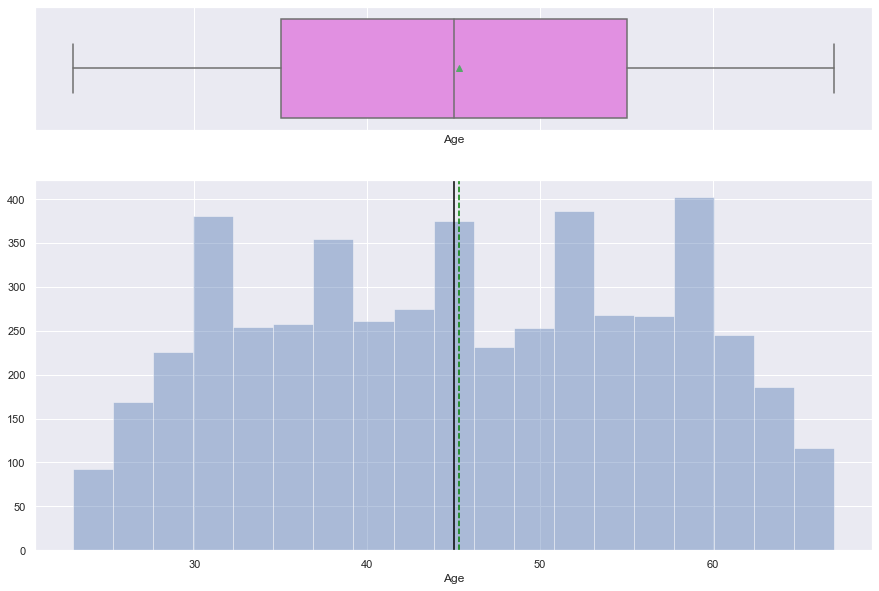

In [17]:
histogram_boxplot(bank['Age'])

OBSERVATIONS:

* The average age of the current customer base is 45 years old.
* Appears to have a normal distribution.

### Observations on Experience: 

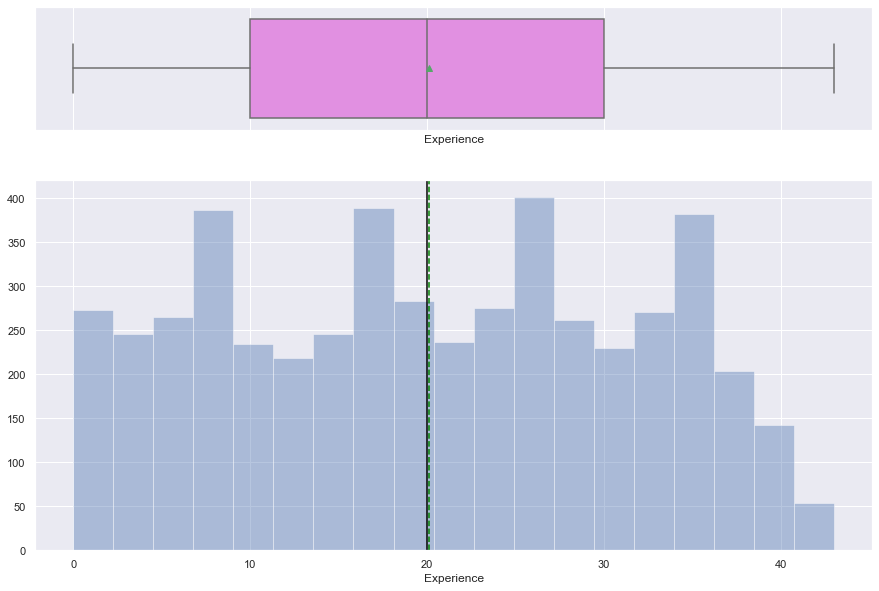

In [18]:
histogram_boxplot(bank['Experience'])

 OBSERVATIONS:

* The average experience is approximately 20 years.
* Appears to have a normal distribution.

### Observations on Income: 

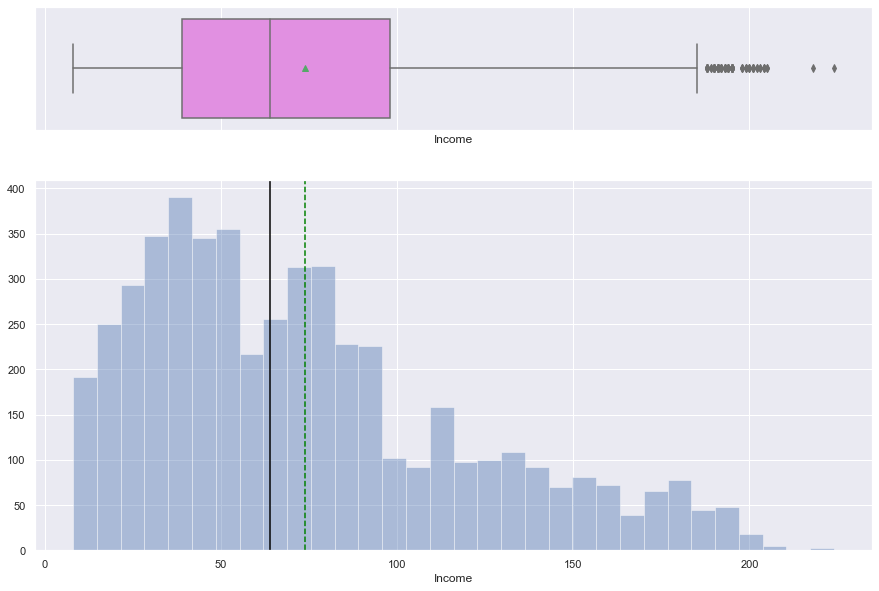

In [19]:
histogram_boxplot(bank['Income'])

OBSERVATIONS:

* The median is less than the mean indicating a right skew of the data.
* The average income is approximately $74,000.

### Observations on ZIPCode: 

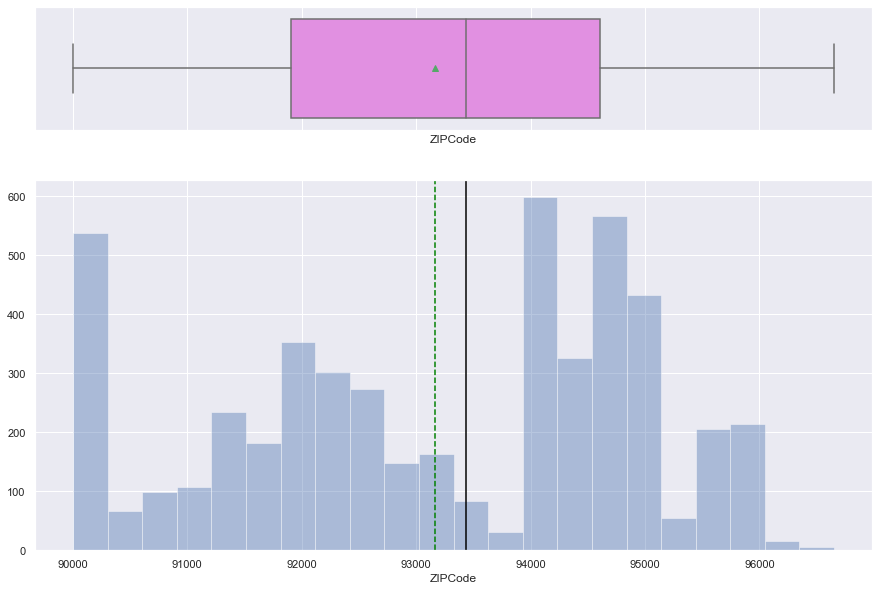

In [20]:
histogram_boxplot(bank['ZIPCode'])

OBSERVATIONS:

* Since this data is based on zipcodes, it's difficult to gleen insights into what the data is telling us at this point. There are certainly some zipcodes with higher counts than others. I'm going to keep the data as is and work my way through the project before deciding if I will do additional processing. 

### Observations on Family: 

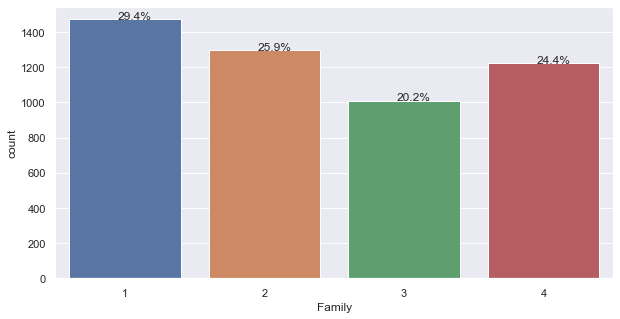

In [21]:
plt.figure(figsize=(10,5))
ax = sns.countplot(bank['Family'])
plt.xlabel('Family')
plt.ylabel('count')
bar_perc(ax,bank['Family']) 

OBSERVATIONS:

* Most customers have a family size of 1 person. 2 and 4 person families are a close second. 

### Observations on CCAvg: 

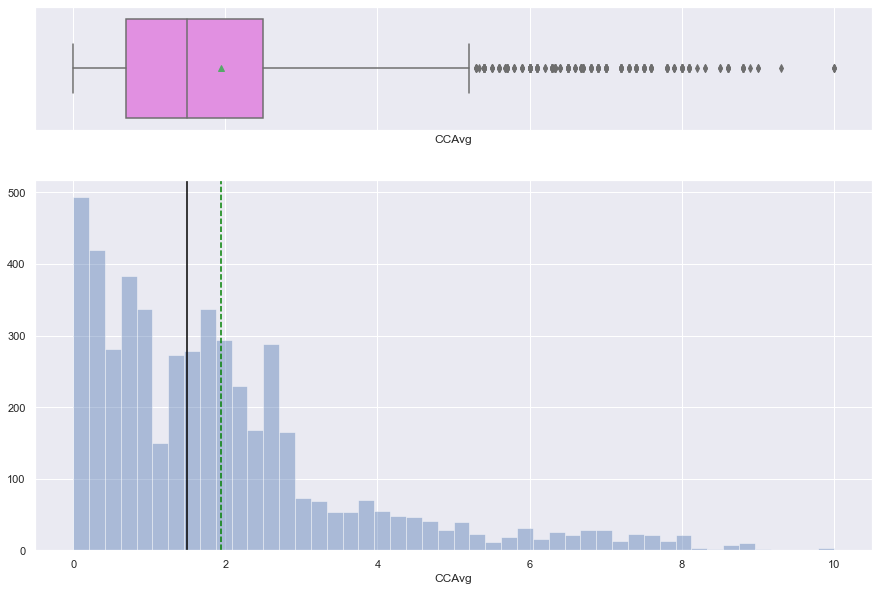

In [22]:
histogram_boxplot(bank['CCAvg'])

OBSERVATIONS:

* The median is less than the mean indicating right skewed data.
* The average spending on credit cards is right under $2,000.

### Observations on Education: 

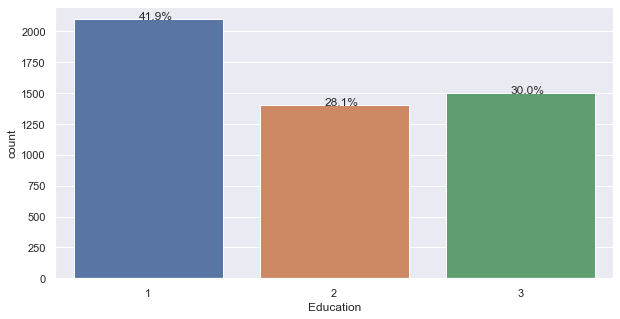

In [23]:
plt.figure(figsize=(10,5))
ax = sns.countplot(bank['Education'])
plt.xlabel('Education')
plt.ylabel('count')
bar_perc(ax,bank['Education'])

OBSERVATIONS:

* Approximately 42% of customers have received an Undergraduate degree.
* The remaining customers are almost equally split between Graduate and Advanced degrees levels.

### Observations on Mortgage: 

<AxesSubplot:xlabel='Mortgage'>

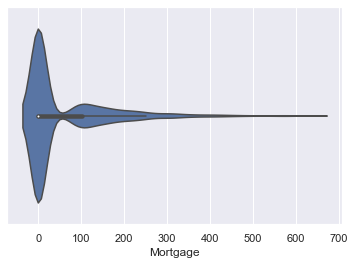

In [24]:
sns.violinplot(bank['Mortgage'])

 OBSERVATIONS:

* There seems to be a large proportion of customers with a zero dollar mortgage. This could mean either they are renters or they have paid off their mortgage. Based on this data, there is no way of telling but it could be something to ask going forward when collecting data.
* The mean is 56,500 dollars while the max value is 635,000 dollars. The data is incredibly skewed. We can review it further and determine how to proceed. 

### Observations on Personal Loan:  

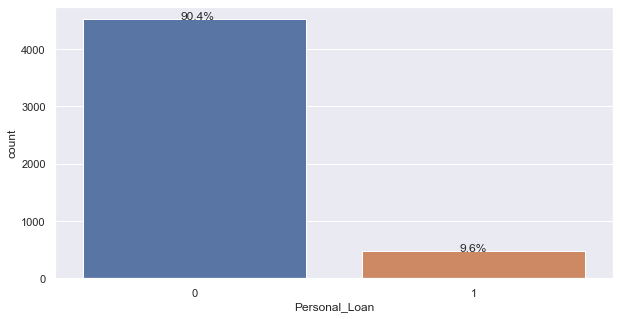

In [25]:
plt.figure(figsize=(10,5))
ax = sns.countplot(bank['Personal_Loan'])
plt.xlabel('Personal_Loan')
plt.ylabel('count')
bar_perc(ax,bank['Personal_Loan'])

OBSERVATIONS:

* 90% of customers did not accept a personal loan through the bank during the last campaign. 

### Observations on Securities Account: 

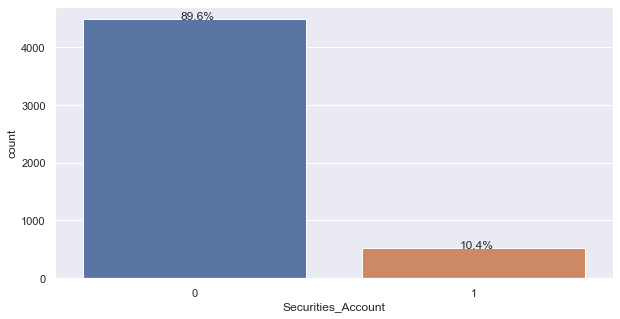

In [26]:
plt.figure(figsize=(10,5))
ax = sns.countplot(bank['Securities_Account'])
plt.xlabel('Securities_Account')
plt.ylabel('count')
bar_perc(ax,bank['Securities_Account'])

OBSERVATIONS:

* 90% of customers do not have a Securities account with the bank. 

### Observations on CD Account: 

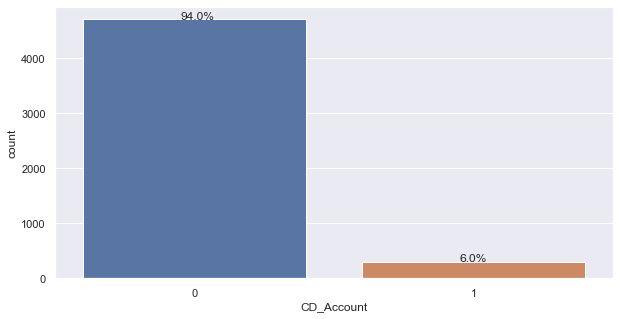

In [27]:
plt.figure(figsize=(10,5))
ax = sns.countplot(bank['CD_Account'])
plt.xlabel('CD_Account')
plt.ylabel('count')
bar_perc(ax,bank['CD_Account'])

OBSERVATIONS:

* 94% of customers do not have a CD account with the bank.

### Observations on Online: 

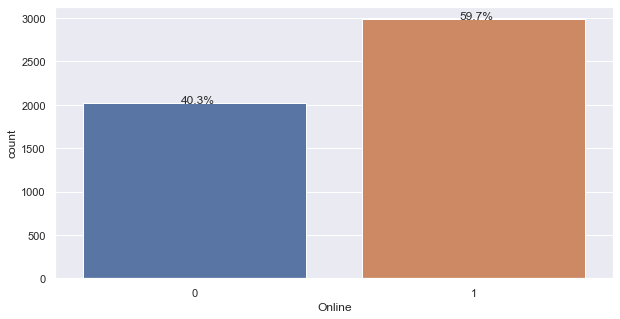

In [28]:
plt.figure(figsize=(10,5))
ax = sns.countplot(bank['Online'])
plt.xlabel('Online')
plt.ylabel('count')
bar_perc(ax,bank['Online'])

OBSERVATIONS:

* 60% of customers are online. 

### Observations on Credit Card: 

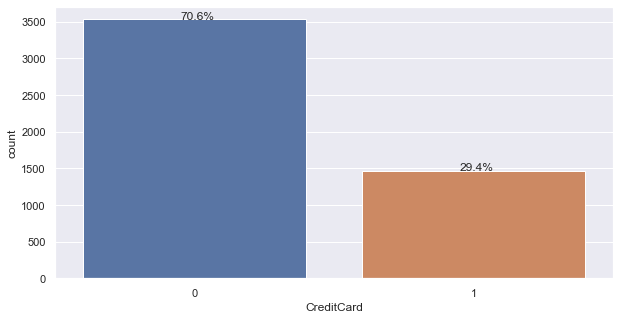

In [29]:
plt.figure(figsize=(10,5))
ax = sns.countplot(bank['CreditCard'])
plt.xlabel('CreditCard')
plt.ylabel('count')
bar_perc(ax,bank['CreditCard'])

OBSERVATIONS:

* 71% of customers have a credit card issued by another bank.

### Correlation based on heatmap: 

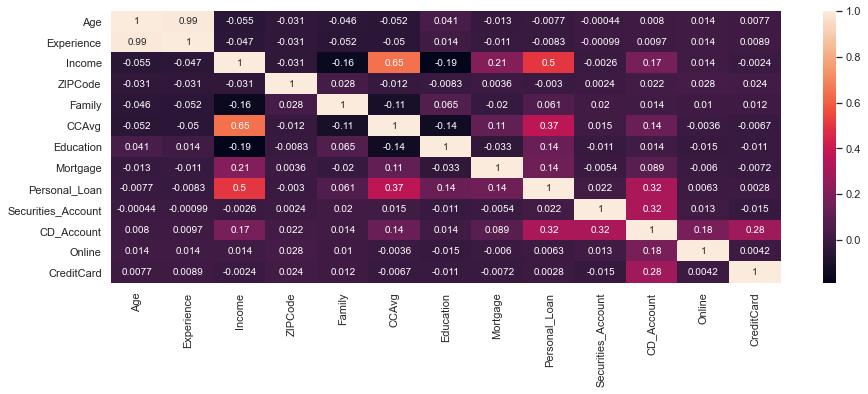

In [30]:
plt.figure(figsize=(15,5))
sns.heatmap(bank.corr(),annot=True)
plt.show()

 OBSERVATIONS:

* Age and Experience have a 99% correlation. This relationship is not a surprise.
* Income and CCAvg have a 65% correlation which is not huge but worth noting and to be aware of. 

### Pairplot: 

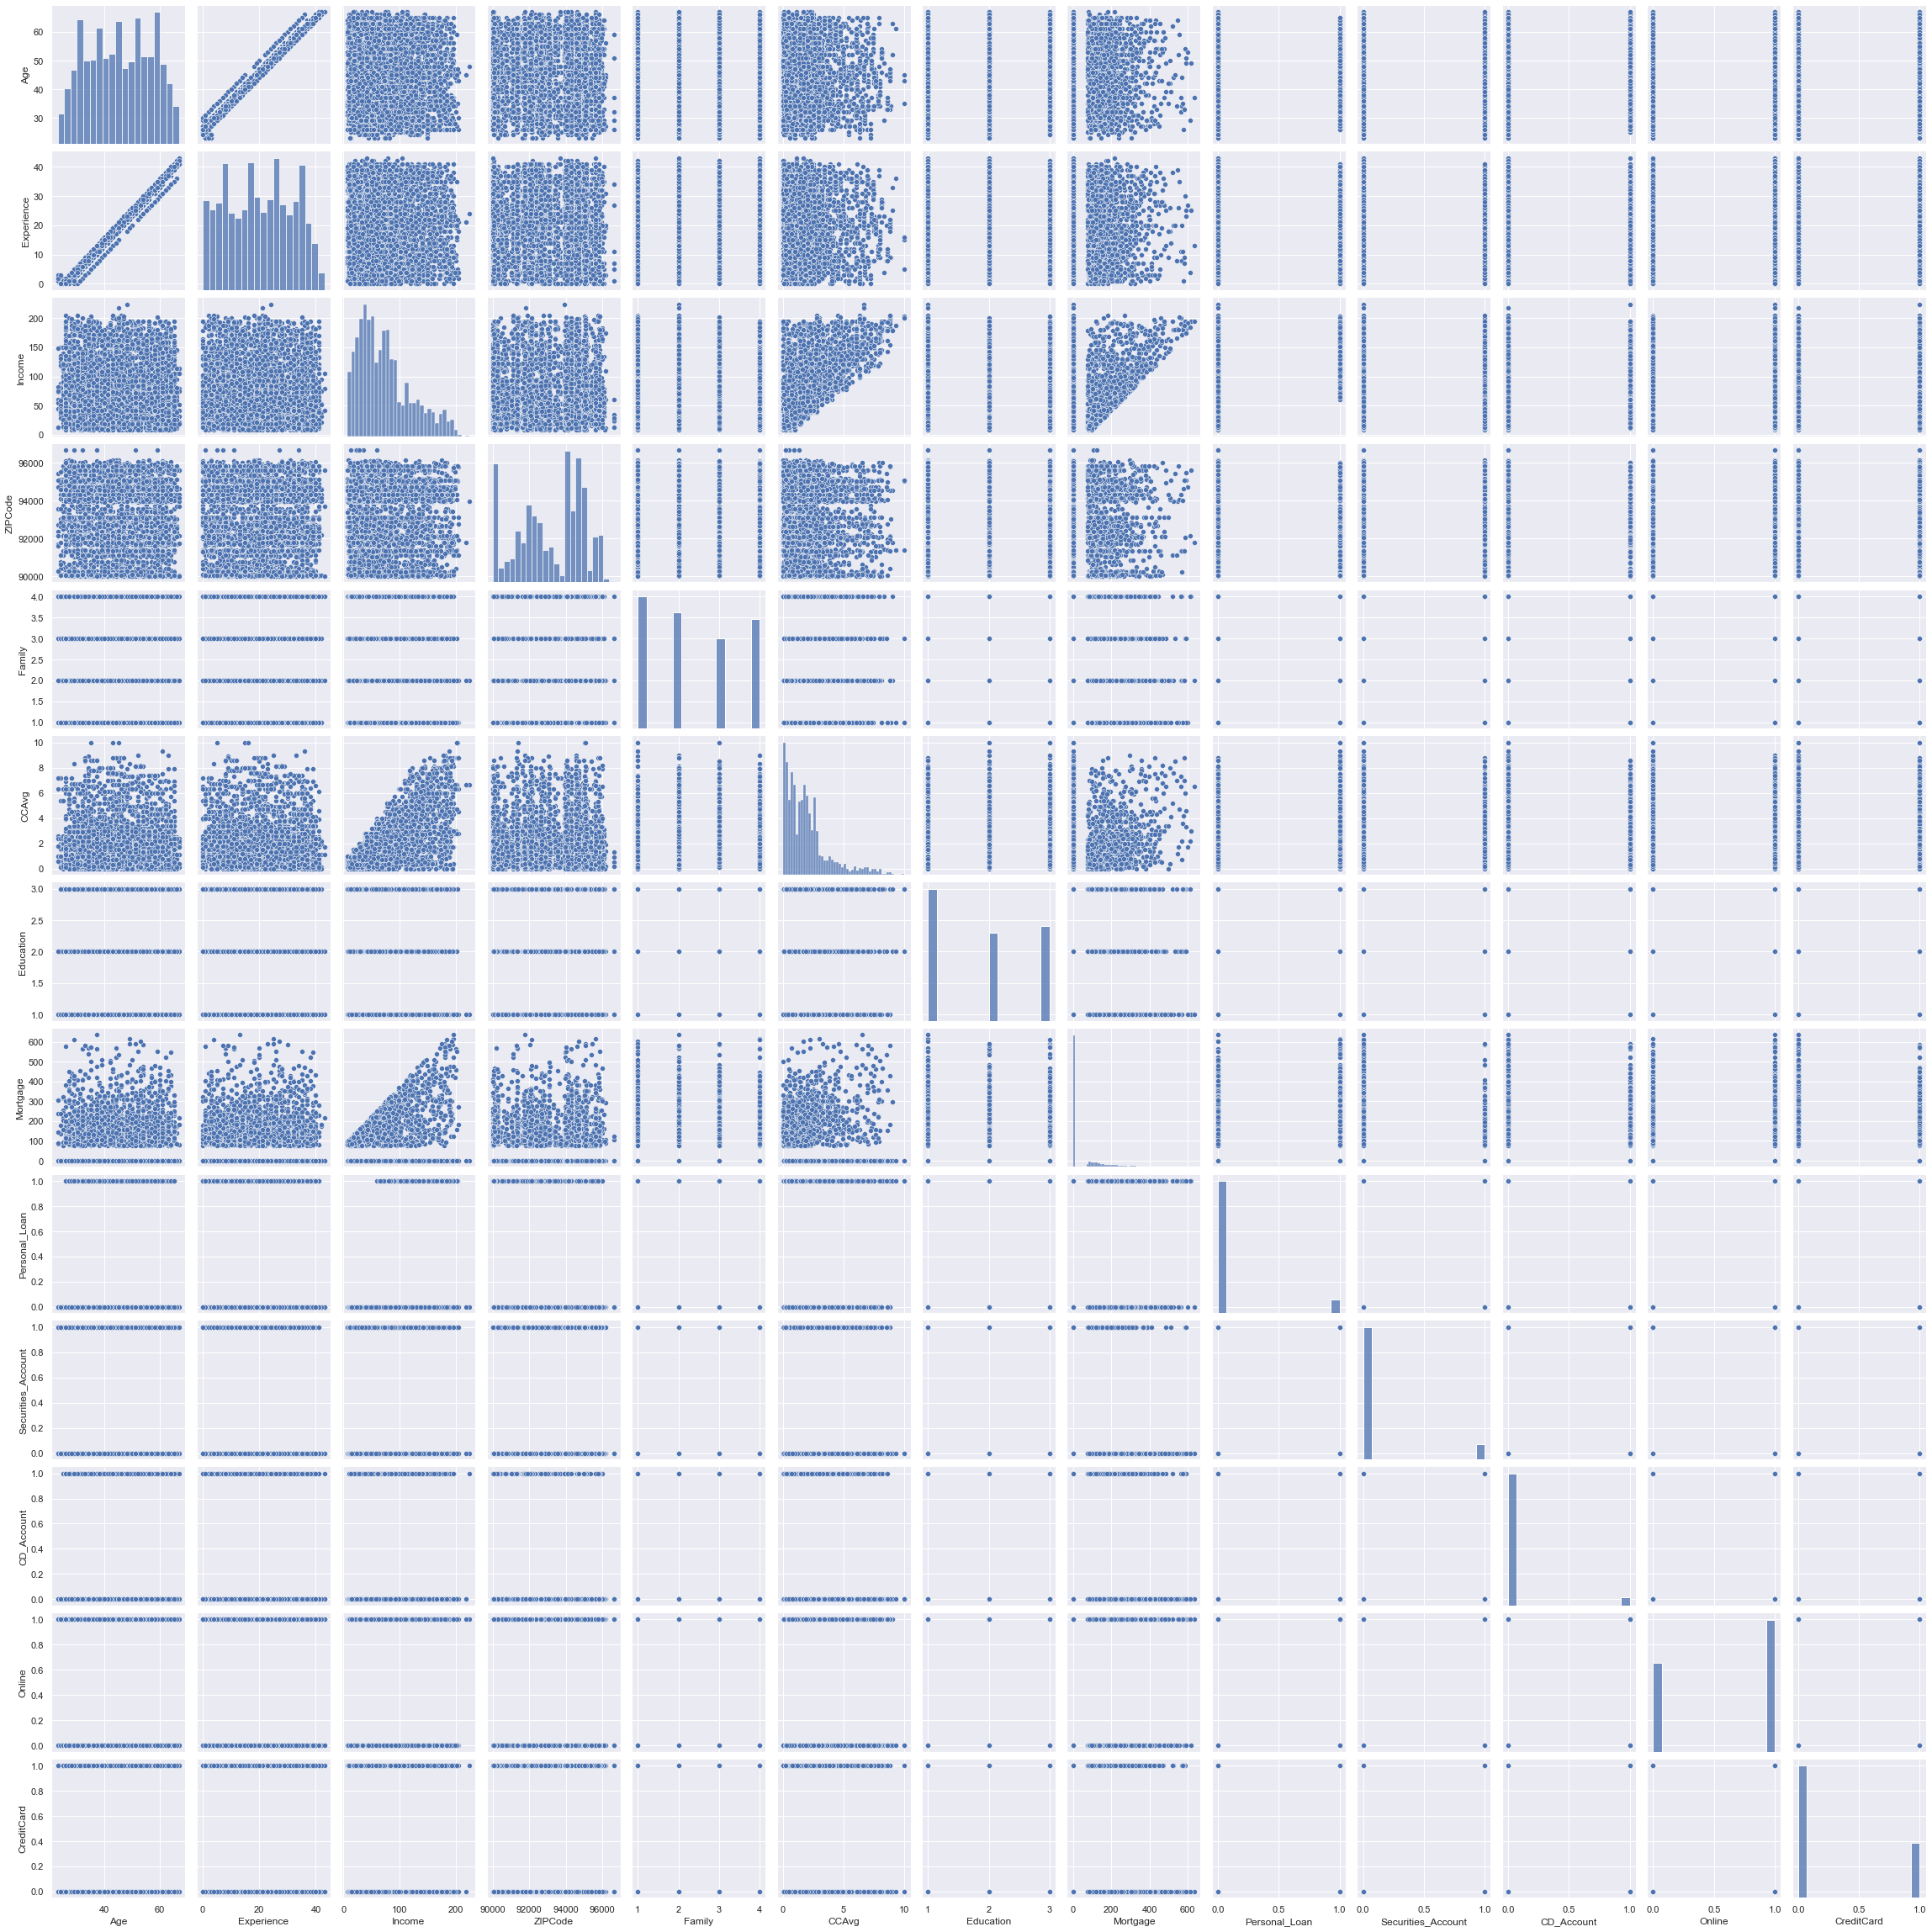

In [31]:
sns.pairplot(bank)

OBSERVATIONS:

* Strong relationship between age and experience exists.
* Income has a positive relationship with Mortgage and CCAvg.

# Bivariate/Multivariate analysis:

### Relationship between Age and Experience: 

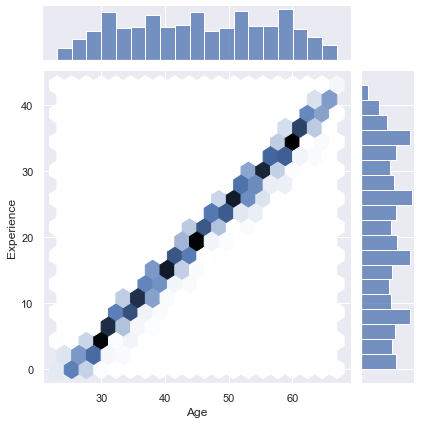

In [32]:
sns.jointplot(bank['Age'], bank['Experience'], kind = "hex")
plt.show()

OBSERVATIONS:

* As the client's age increases, so does their expereience.

### Relationship between CCAvg and Income: 

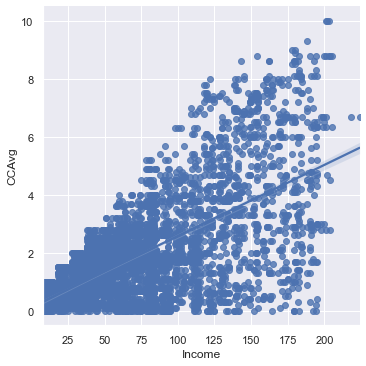

In [33]:
sns.lmplot(y="CCAvg", x="Income", data=bank);

OBSERVATIONS:

* As the client's income increases, in most cases, the amount they spend on their credit card each month increases.

### Comparing those who have not/have accepted a personal loan with their income amounts: 

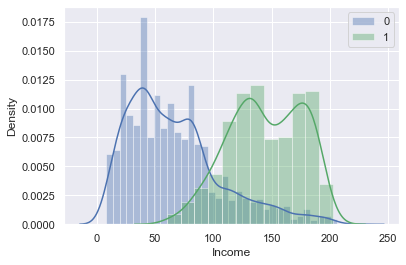

In [34]:
sns.distplot(bank[bank['Personal_Loan']==0]['Income'],color='b',label=0)
sns.distplot(bank[bank['Personal_Loan']==1]['Income'],color='g',label=1)
plt.legend()
plt.show()

OBSERVATIONS:

* Those with a higher income are more inclined to accept a personal loan with the bank. 

### Comparing those who do not/do have a Securities Account with their income amounts:  

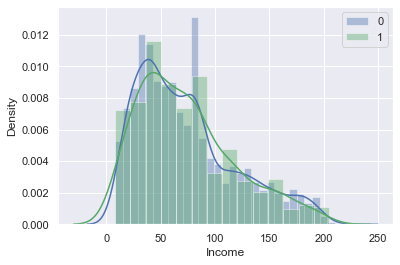

In [35]:
sns.distplot(bank[bank['Securities_Account']==0]['Income'],color='b',label=0)
sns.distplot(bank[bank['Securities_Account']==1]['Income'],color='g',label=1)
plt.legend()
plt.show()

OBSERVATIONS: 

* Based on income, there is an almost equal number of client's who either do not/do have a Securities Account.
* Those with income under 100K are most densely populated.

### Comparing those who do not/do have a CD Account with their income amounts:   

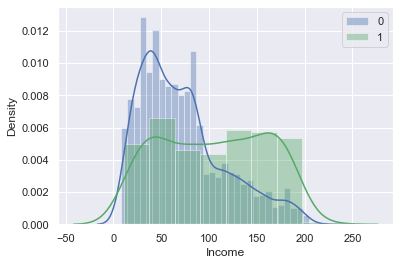

In [36]:
sns.distplot(bank[bank['CD_Account']==0]['Income'],color='b',label=0)
sns.distplot(bank[bank['CD_Account']==1]['Income'],color='g',label=1)
plt.legend()
plt.show()

OBSERVATIONS:

* Those who do have a CD Account with the bank are evenly dispersed and have a full range of income levels.
* Those who do not have a CD Account are more likely to be in a lower income bracket. 

### Comparing those who are not/are online: 

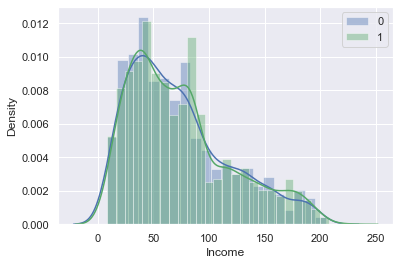

In [37]:
sns.distplot(bank[bank['Online']==0]['Income'],color='b',label=0)
sns.distplot(bank[bank['Online']==1]['Income'],color='g',label=1)
plt.legend()
plt.show()

OBSERVATIONS:

* Both clients who are not and are online are equally dispersed with regard to income levels.
* Those with income under 100K are most densely populated.

### Comparing those who either do not/do have a credit card with another bank: 

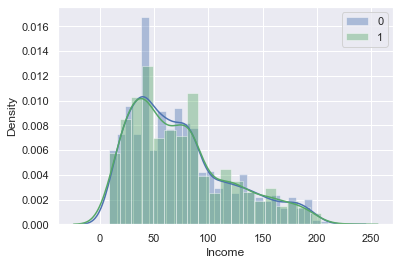

In [38]:
sns.distplot(bank[bank['CreditCard']==0]['Income'],color='b',label=0)
sns.distplot(bank[bank['CreditCard']==1]['Income'],color='g',label=1)
plt.legend()
plt.show()

OBSERVATIONS:

* Both clients who do not/do have credit cards with other banks are almost equally dispersed amongst income levels.
* Those with income under 100K are most densely populated.

### Relationship between Family, Income and Personal Loan: 

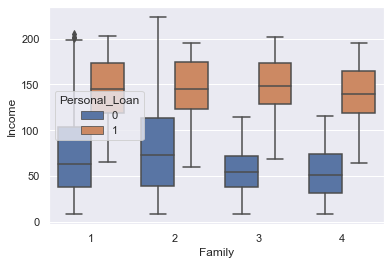

In [39]:
sns.boxplot(bank['Family'], bank['Income'], hue=bank['Personal_Loan']);

OBSERVATIONS:

* For those who have accepted a personal loan, they show higher income. The family size does not appear to make a significant difference with regard to Personal loan acceptance.   

### Relationship between Education, Income and Personal Loan:  

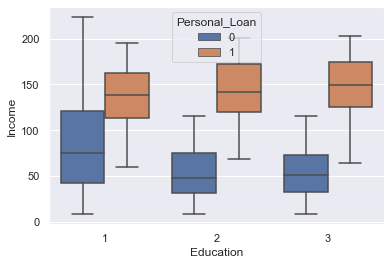

In [40]:
sns.boxplot(bank['Education'], bank['Income'], hue=bank['Personal_Loan']);

OBSERVATIONS:

* There is a greater proportion of those with an undergraduate level education who did not accept a Personal loan than did accept.
* Otherwise, those with graduate level and professional level education agreed either for or against accepting a Personal loan about the same amount. 
* Higher income does seem to play some part in their acceptance as well.

### Relationship between Credit Card, Income and Personal Loan:  

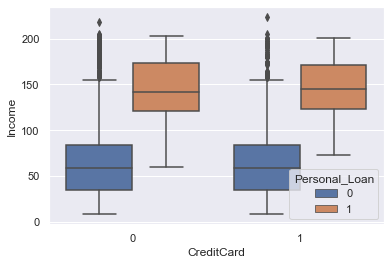

In [41]:
sns.boxplot(bank['CreditCard'], bank['Income'], hue=bank['Personal_Loan']);

OBSERVATIONS:

* Those with higher income who accepted a Personal loan are more likely to have credit cards through other banks. 
* However, there are some outliers amongst those with (on average) lower income. They make more than their cohorts but did not accept a Personal loan from the bank. 

### Relationship between Online, Income and Personal Loan:  

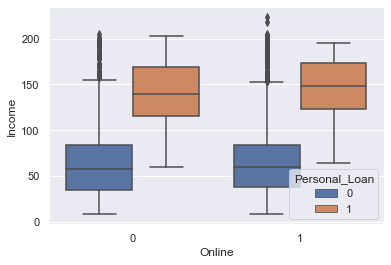

In [42]:
sns.boxplot(bank['Online'], bank['Income'], hue=bank['Personal_Loan']);

OBSERVATIONS:

* Regardless of whether or not the client uses the internet or not, does not seem to decide if they are more likely to accept a Personal loan. 

### Relationship between CD Account, Income and Personal Loan:  

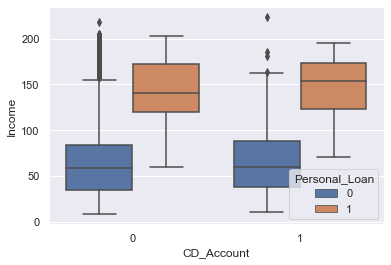

In [43]:
sns.boxplot(bank['CD_Account'], bank['Income'], hue=bank['Personal_Loan']);

OBSERVATIONS:

* Those who either do not/do have a CD Account are equally distributed with regard to income.
* There are some outliers with those who have not opted to have a CD Account who are in a higher income bracket.

### Relationship between Securities Account, Income and Personal Loan:  

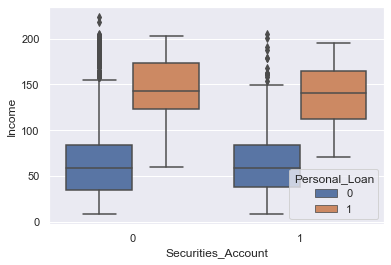

In [44]:
sns.boxplot(bank['Securities_Account'], bank['Income'], hue=bank['Personal_Loan']);

OBSERVATIONS:

* Those who either do not/do have a personal loan with the bank are equally distributed with regard to income.
* There are some outliers with those who have not accepted a Securities account who are in a higher income bracket. 

# Data Pre-processing

### Use MinMaxScaler on Income, CCAvg, Mortgage, Age, and Experience:

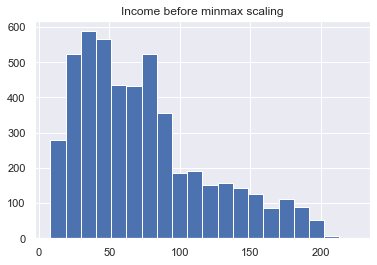

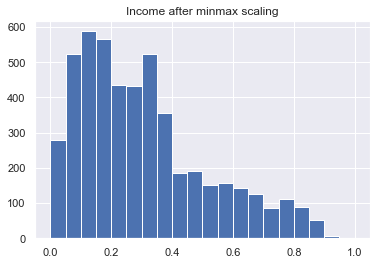

In [45]:
bank['Income'].hist(bins=20) # Shows the histogram prior to scaling for reference.
plt.title('Income before minmax scaling')
plt.show()

scaler = MinMaxScaler()
bank['Income'] = scaler.fit_transform(bank[['Income']]) # Applies the scaling directly to the column.

bank['Income'].hist(bins=20) #Shows the histogram after scaling.
plt.title('Income after minmax scaling')
plt.show()

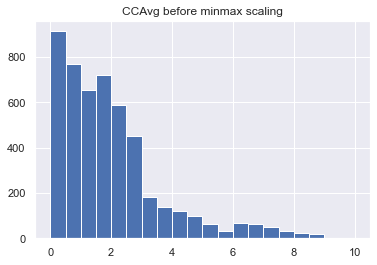

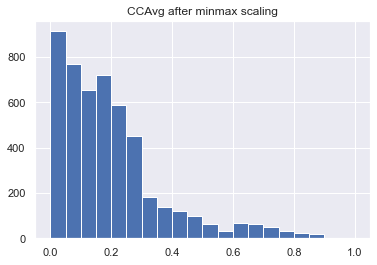

In [46]:
bank['CCAvg'].hist(bins=20) # Shows the histogram prior to scaling for reference.
plt.title('CCAvg before minmax scaling')
plt.show()

scaler = MinMaxScaler()
bank['CCAvg'] = scaler.fit_transform(bank[['CCAvg']]) # Applies the scaling directly to the column.

bank['CCAvg'].hist(bins=20) #Shows the histogram after scaling.
plt.title('CCAvg after minmax scaling')
plt.show()

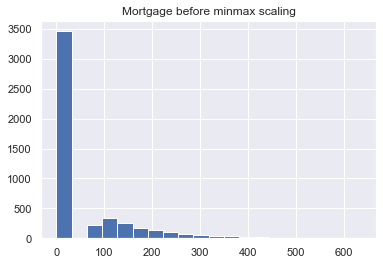

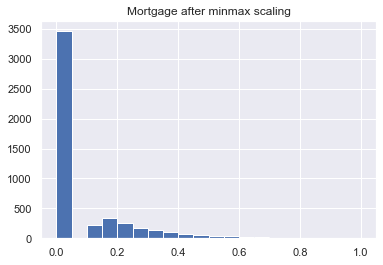

In [47]:
bank['Mortgage'].hist(bins=20) # Shows the histogram prior to scaling for reference.
plt.title('Mortgage before minmax scaling')
plt.show()

scaler = MinMaxScaler()
bank['Mortgage'] = scaler.fit_transform(bank[['Mortgage']]) # Applies the scaling directly to the column.

bank['Mortgage'].hist(bins=20) #Shows the histogram after scaling.
plt.title('Mortgage after minmax scaling')
plt.show()

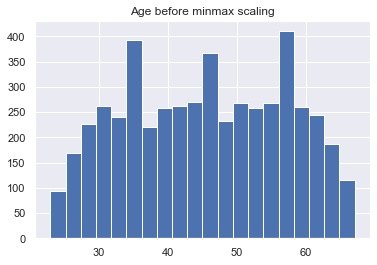

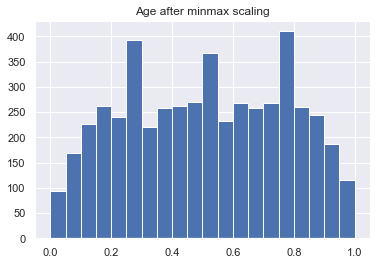

In [48]:
bank['Age'].hist(bins=20) # Shows the histogram prior to scaling for reference.
plt.title('Age before minmax scaling')
plt.show()

scaler = MinMaxScaler()
bank['Age'] = scaler.fit_transform(bank[['Age']]) # Applies the scaling directly to the column.

bank['Age'].hist(bins=20) #Shows the histogram after scaling.
plt.title('Age after minmax scaling')
plt.show()

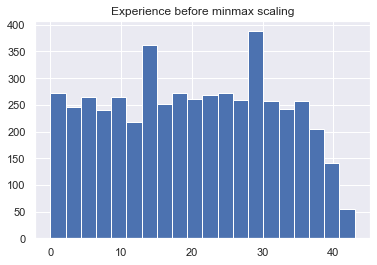

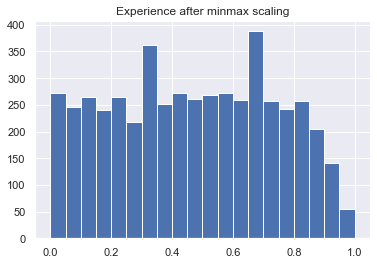

In [49]:
bank['Experience'].hist(bins=20) # Shows the histogram prior to scaling for reference.
plt.title('Experience before minmax scaling')
plt.show()

scaler = MinMaxScaler()
bank['Experience'] = scaler.fit_transform(bank[['Experience']]) # Applies the scaling directly to the column.

bank['Experience'].hist(bins=20) #Shows the histogram after scaling.
plt.title('Experience after minmax scaling')
plt.show()

### Power scaling Income, CCAvg, Mortgage, Age, and Experience:

In [50]:
from sklearn.preprocessing import PowerTransformer
pt = PowerTransformer()
print(pt.fit(bank[['Income']]))
PowerTransformer()
print(pt.lambdas_)
print(pt.transform(bank[['Income']]))

PowerTransformer()
[-1.78450881]
[[-0.42801532]
 [-0.91433588]
 [-1.84663816]
 ...
 [-1.28813457]
 [-0.42801532]
 [ 0.42565234]]


In [51]:
pt = PowerTransformer()
print(pt.fit(bank[['CCAvg']]))
PowerTransformer()
print(pt.lambdas_)
print(pt.transform(bank[['CCAvg']]))

PowerTransformer()
[-3.68923701]
[[ 0.07762532]
 [-0.0030645 ]
 [-0.46047044]
 ...
 [-1.29066513]
 [-1.02667997]
 [-0.67227493]]


In [52]:
pt = PowerTransformer()
print(pt.fit(bank[['Mortgage']]))
PowerTransformer()
print(pt.lambdas_)
print(pt.transform(bank[['Mortgage']]))

PowerTransformer()
[-9.95913018]
[[-0.66101114]
 [-0.66101114]
 [-0.66101114]
 ...
 [-0.66101114]
 [-0.66101114]
 [-0.66101114]]


In [53]:
pt = PowerTransformer()
print(pt.fit(bank[['Age']]))
PowerTransformer()
print(pt.lambdas_)
print(pt.transform(bank[['Age']]))

PowerTransformer()
[0.86668043]
[[-1.80077257]
 [-0.01782859]
 [-0.54398124]
 ...
 [ 1.52483549]
 [ 1.69334531]
 [-1.52761131]]


In [54]:
pt = PowerTransformer()
print(pt.fit(bank[['Experience']]))
PowerTransformer()
print(pt.lambdas_)
print(pt.transform(bank[['Experience']]))

PowerTransformer()
[0.80032678]
[[-1.711436  ]
 [-0.08104426]
 [-0.43409443]
 ...
 [ 1.62234304]
 [ 1.70516442]
 [-1.43161135]]


In [55]:
bank.head()

,Age,Experience,Income,ZIPCode,Family,CCAvg,Education,Mortgage,Personal_Loan,Securities_Account,CD_Account,Online,CreditCard
0,0.045455,0.023256,0.189815,91107,4,0.16,1,0.0,0,1,0,0,0
1,0.500000,0.441860,0.120370,90089,3,0.15,1,0.0,0,1,0,0,0
2,0.363636,0.348837,0.013889,94720,1,0.10,1,0.0,0,0,0,0,0
3,0.272727,0.209302,0.425926,94112,1,0.27,2,0.0,0,0,0,0,0
4,0.272727,0.186047,0.171296,91330,4,0.10,2,0.0,0,0,0,0,1


# Logistic Regression Model Building 

### Define X and Y variables: 

In [56]:
X = bank.drop(['Personal_Loan'], axis=1) #Remove Personal_Loan from our X variable since it will be used for our Y variable
y = bank[['Personal_Loan']]

print(X.head())
print(y.head())

        Age  Experience    Income  ZIPCode  Family  CCAvg  Education  \
0  0.045455    0.023256  0.189815    91107       4   0.16          1   
1  0.500000    0.441860  0.120370    90089       3   0.15          1   
2  0.363636    0.348837  0.013889    94720       1   0.10          1   
3  0.272727    0.209302  0.425926    94112       1   0.27          2   
4  0.272727    0.186047  0.171296    91330       4   0.10          2   

   Mortgage  Securities_Account  CD_Account  Online  CreditCard  
0       0.0                   1           0       0           0  
1       0.0                   1           0       0           0  
2       0.0                   0           0       0           0  
3       0.0                   0           0       0           0  
4       0.0                   0           0       0           1  
   Personal_Loan
0              0
1              0
2              0
3              0
4              0


In [57]:
print(X.shape)
print(y.shape)

(5000, 12)
(5000, 1)


### Split data into train/test:

In [58]:
from sklearn.model_selection import train_test_split

X = bank.drop('Personal_Loan',axis=1)     
Y = bank['Personal_Loan']  

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.30,random_state=1, stratify=y, shuffle=True) 

In [59]:
X_train.head()

,Age,Experience,Income,ZIPCode,Family,CCAvg,Education,Mortgage,Securities_Account,CD_Account,Online,CreditCard
3465,0.954545,0.953488,0.157407,95616,1,0.19,2,0.0,0,0,0,0
4582,0.045455,0.023256,0.282407,92691,3,0.03,3,0.0,0,0,1,0
1922,0.363636,0.348837,0.078704,93023,1,0.14,3,0.0,0,0,0,0
1186,0.886364,0.883721,0.162037,94928,4,0.12,2,0.0,0,0,1,0
3718,0.500000,0.441860,0.000000,92833,2,0.01,3,0.0,0,0,0,1


In [60]:
y_train.head()

,Personal_Loan
3465,0
4582,0
1922,0
1186,0
3718,0


### Logistic regression: 

In [61]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression(random_state=1, class_weight='balanced') # By weighting our class weight as balanced, we are hoping to offset the how unbalanced our data is ie. 90% clients did not accept a personal loan in the last marketing campaign 
logreg.fit(X_train, y_train)

LogisticRegression(class_weight='balanced', random_state=1)

### Model performance: 

In [62]:
#Predict for train set
pred_train = logreg.predict(X_train)

from sklearn.metrics import classification_report,confusion_matrix
mat_train = confusion_matrix(y_train,pred_train)

In [63]:
def make_confusion_matrix(y_actual,y_predict,labels=[1, 0]):
    '''
    y_predict: prediction of class
    y_actual : ground truth  
    '''
    cm=confusion_matrix( y_actual,y_predict, labels=[1, 0])
    bank_cm = pd.DataFrame(cm, index = [i for i in ["1","0"]],
                  columns = [i for i in ['1','0']])
    group_counts = ["{0:0.0f}".format(value) for value in
                cm.flatten()]
    group_percentages = ["{0:.2%}".format(value) for value in
                         cm.flatten()/np.sum(cm)]
    labels = [f"{v1}\n{v2}" for v1, v2 in
              zip(group_counts,group_percentages)]
    labels = np.asarray(labels).reshape(2,2)
    plt.figure(figsize = (10,7))
    sns.heatmap(bank_cm, annot=labels,fmt='')
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

confusion matrix = 



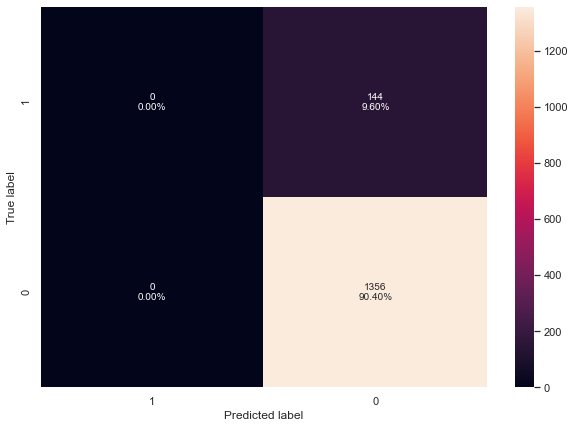

In [64]:
#Confusion matrix on test set
pred_test = logreg.predict(X_test)


print("confusion matrix = \n")
make_confusion_matrix(y_test,pred_test)

 OBSERVATIONS:

* True positives and False Negatives both show zero results. This could be the effects of how unbalanced the data is and the programs ability to balance that may not be strong enough.
* True negatives show 90 percent of the clients will not accept a loan on test data. 
* Almost 10 percent False Positives is not good since these are a Type 1 error.

In [65]:
#Check accuracy with a threshold of 0.5
from sklearn.metrics import accuracy_score
print('Accuracy on train data:',accuracy_score(y_train, pred_train) )
print('Accuracy on test data:',accuracy_score(y_test, pred_test))

Accuracy on train data: 0.904
Accuracy on test data: 0.904


### AUC ROC curve 

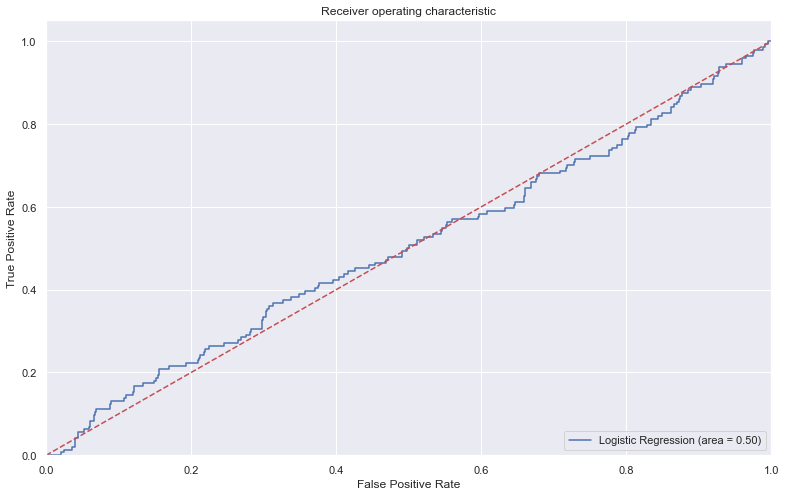

In [66]:
#AUC ROC curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

logit_roc_auc = roc_auc_score(y_test, logreg.predict_proba(X_test)[:,1])
fpr, tpr, thresholds = roc_curve(y_test, logreg.predict_proba(X_test)[:,1])
plt.figure(figsize=(13,8))
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

OBSERVATIONS:

* We want to work to increase the area under the curve. 

### Optimal threshold: 

In [67]:
# The optimal cut off would be where TPR is high and FPR is low
fpr, tpr, thresholds = roc_curve(y_test, logreg.predict_proba(X_test)[:,1])

optimal_idx = np.argmax(tpr - fpr)
optimal_threshold = thresholds[optimal_idx]
print(optimal_threshold)

0.49997888343485836


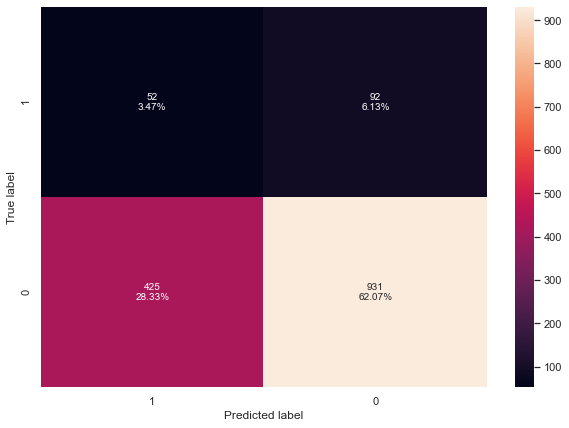

In [68]:
target_names = ['positive', 'negative']
y_pred_tr = (logreg.predict_proba(X_train)[:,1]>optimal_threshold).astype(int)
y_pred_ts = (logreg.predict_proba(X_test)[:,1]>optimal_threshold).astype(int)

make_confusion_matrix(y_test,y_pred_ts)

 OBSERVATIONS: 

* After using optimal threshold, we have True Positives at 3 percent and True Negatives at 62 percent. 
* Type 2 Errors or False Negatives have increased to 28 percent.
* Type 1 Errors or False Positives have dropped to approximatly 6 percent. 

In [69]:
#Accuracy with optimal threshold
from sklearn.metrics import accuracy_score
print('Accuracy on train data:',accuracy_score(y_train, y_pred_tr) )
print('Accuracy on test data:',accuracy_score(y_test, y_pred_ts))

Accuracy on train data: 0.6697142857142857
Accuracy on test data: 0.6553333333333333


### Check for Multicollinearity:  

* Check for multicollinearity using Variation Inflation Factor. 'It is a measure of how much the variance of the estimated regression coefficient βk is “inflated” by the existence of correlation among the predictor variables in the model.'
* If VIF is 1, there is not an inflation of the variance. 
* If VIF is 5 or greater, then there is an inflation and multicollinearity exists.
* If VIF is 10 or greater, then this shows high inflation and a strong multicollinearity exists.

In [70]:
# let us select numerical columns
#numerical_columns = bank.select_dtypes(include=np.number).columns.tolist()num_feature_set = X.copy()
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant
num_feature_set = X.copy()
num_feature_set = add_constant(num_feature_set)

In [71]:
vif_series1 = pd.Series([variance_inflation_factor(num_feature_set.values,i) for i in range(num_feature_set.shape[1])],index=num_feature_set.columns)
print('Series before feature selection: \n\n{}\n'.format(vif_series1))

Series before feature selection: 

const                 2844.945498
Age                     89.447652
Experience              89.346141
Income                   1.860334
ZIPCode                  1.004541
Family                   1.033905
CCAvg                    1.727687
Education                1.108059
Mortgage                 1.051365
Securities_Account       1.137026
CD_Account               1.329668
Online                   1.040210
CreditCard               1.108233
dtype: float64



## Drop columns with high multicollinearity: 

### Dropping both Age and Experience columns: 

In [72]:
variables_with_high_collinearity = vif_series1[vif_series1.values>=89].index.tolist()
num_feature_set = num_feature_set.drop(variables_with_high_collinearity,axis=1)

In [73]:
vif_series1 = pd.Series([variance_inflation_factor(num_feature_set.values,i) for i in range(num_feature_set.shape[1])],index=num_feature_set.columns)
print('Series before feature selection: \n\n{}\n'.format(vif_series1))

Series before feature selection: 

Income                 5.621626
ZIPCode               17.352946
Family                 5.515883
CCAvg                  3.842604
Education              6.251629
Mortgage               1.375779
Securities_Account     1.269056
CD_Account             1.412807
Online                 2.579419
CreditCard             1.569707
dtype: float64



### Will now drop ZIPCode and reevaluate:

In [74]:
variables_with_high_collinearity = vif_series1[vif_series1.values>=17].index.tolist()
num_feature_set = num_feature_set.drop(variables_with_high_collinearity,axis=1)

In [75]:
vif_series1 = pd.Series([variance_inflation_factor(num_feature_set.values,i) for i in range(num_feature_set.shape[1])],index=num_feature_set.columns)
print('Series before feature selection: \n\n{}\n'.format(vif_series1))

Series before feature selection: 

Income                4.912009
Family                3.922378
CCAvg                 3.811257
Education             3.939146
Mortgage              1.368161
Securities_Account    1.244558
CD_Account            1.358622
Online                2.313928
CreditCard            1.499491
dtype: float64



We have removed all columns with high multicollinearity and can proceed using the remaining columns.

## Build logistic regression model 

### Split train & test data: 

In [76]:
X_train, X_test, y_train, y_test = train_test_split(num_feature_set, Y, test_size=0.30, random_state=1, stratify=y, shuffle=True)

In [77]:
import statsmodels.api as sm
logit = sm.Logit(y_train, X_train)
lg = logit.fit()

Optimization terminated successfully.
         Current function value: 0.279010
         Iterations 8


In [78]:
print(lg.summary())

                           Logit Regression Results                           
Dep. Variable:          Personal_Loan   No. Observations:                 3500
Model:                          Logit   Df Residuals:                     3491
Method:                           MLE   Df Model:                            8
Date:                Thu, 06 May 2021   Pseudo R-squ.:                  0.1011
Time:                        16:18:30   Log-Likelihood:                -976.54
converged:                       True   LL-Null:                       -1086.4
Covariance Type:            nonrobust   LLR p-value:                 4.405e-43
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
Income                 2.5531      0.293      8.722      0.000       1.979       3.127
Family                -0.5380      0.050    -10.704      0.000      -0.637      -0.439
CCAvg               

OBSERVATIONS:

* For variables with a negative coef, as they increase the liklihood the client would potentially accept a loan decreases. Specifically, Family, Education, Mortgage, Securities_Account, Online and CreditCard.
* For variables with a positive coef, as they increase the liklihood the client would potentially accept a loan increases. Specifically, Income and CD_Account.
* CCAvg with a coef of .10 would have no effect on if the client would potentially accept a loan or not regardless of it it increased or decreased.

### Calculations: 

In [79]:
#Calculate the odds ratio from the coef using the formula odds ratio=exp(coef)
#Calculate the probability from the odds ratio using the formula probability = odds / (1+odds)
#Create a data frame to collate Odds ratio, probability and p-value of the coef
lgcoef = pd.DataFrame(lg.params, columns=['coef'])
lgcoef.loc[:, "Odds_ratio"] = np.exp(lgcoef.coef)
lgcoef['probability'] = lgcoef['Odds_ratio']/(1+lgcoef['Odds_ratio'])
lgcoef['pval']=lg.pvalues
pd.options.display.float_format = '{:.2f}'.format

In [80]:
# Filter by significant p-value (pval <0.005) and sort descending by Odds ratio
lgcoef = lgcoef.sort_values(by="Odds_ratio", ascending=False)
pval_filter = lgcoef['pval']<=0.005
lgcoef[pval_filter]

,coef,Odds_ratio,probability,pval
CD_Account,4.59,98.41,0.99,0.00
Income,2.55,12.85,0.93,0.00
Education,-0.44,0.65,0.39,0.00
Family,-0.54,0.58,0.37,0.00
Online,-1.59,0.20,0.17,0.00
Securities_Account,-1.72,0.18,0.15,0.00
CreditCard,-1.73,0.18,0.15,0.00


OBSERVATIONS:

* According to these calculations, the probability that a client with a CD_Account will open a loan account is almost 100%. Income is also a strong indication at 94% probability. 

### Prediction on train data: 

In [81]:
pred_train = lg.predict(X_train)
pred_train = np.round(pred_train)

confusion matrix = 



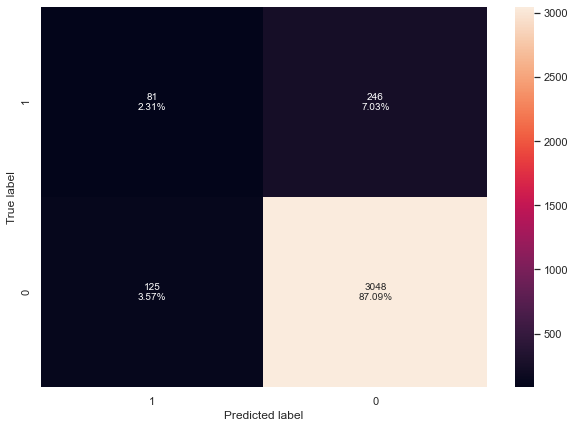

In [82]:
print("confusion matrix = \n")
make_confusion_matrix(y_train,pred_train )

 OBSERVATIONS:

* After adjusting for multicollinearity, we increased True Negatives to 87 percent, and decreased False Negatives to 4 percent.  

### Prediction on test data: 

confusion matrix = 



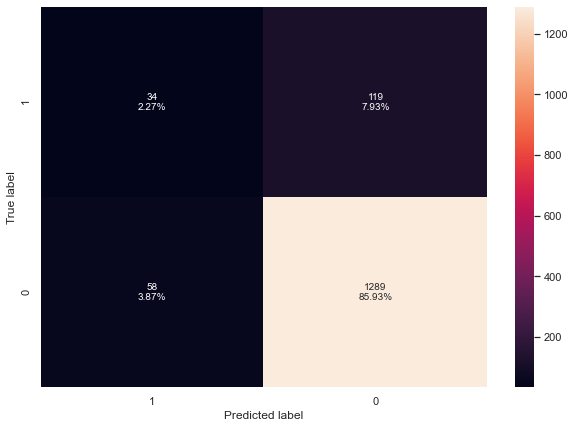

In [83]:
pred_ts = lg.predict(X_test)#predict(X_train)
pred_ts = np.round(pred_ts)
# mat_tst = confusion_matrix(y_test,np.round(pred_ts))

print("confusion matrix = \n")
make_confusion_matrix(y_test,pred_ts )

OBSERVATIONS: 

* The results of the confusion matrix using the test data are quite similiar to when we used the train data.

In [84]:
#Accuracy with a threhold of 0.5
print('Accuracy on train data:',accuracy_score(y_train, pred_train) )
print('Accuracy on test data:',accuracy_score(y_test, pred_ts))

Accuracy on train data: 0.894
Accuracy on test data: 0.882


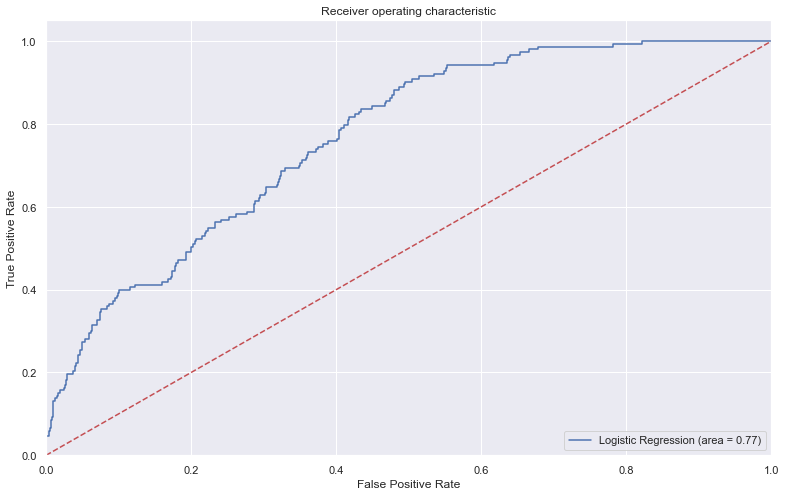

In [88]:
fpr, tpr, thresholds = roc_curve(y_test, lg.predict(X_test))
plt.figure(figsize=(13,8))
logit_roc_auc = roc_auc_score(y_test, lg.predict(X_test))
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

OBSERVATIONS:

* We have increased the area under the curve. 

## Choosing optimal threshold: 

In [89]:
pred_train = lg.predict(X_train)
# The optimal cut off would be where tpr is high and fpr is low
fpr, tpr, thresholds = roc_curve(y_train, pred_train)

optimal_idx = np.argmax(tpr - fpr)
optimal_threshold = thresholds[optimal_idx]
print(optimal_threshold)

0.08604843575411836


In [90]:
target_names = ['1', '0']
y_pred_tr = (lg.predict(X_train)>optimal_threshold).astype(int)
y_pred_ts = (lg.predict(X_test)>optimal_threshold).astype(int)

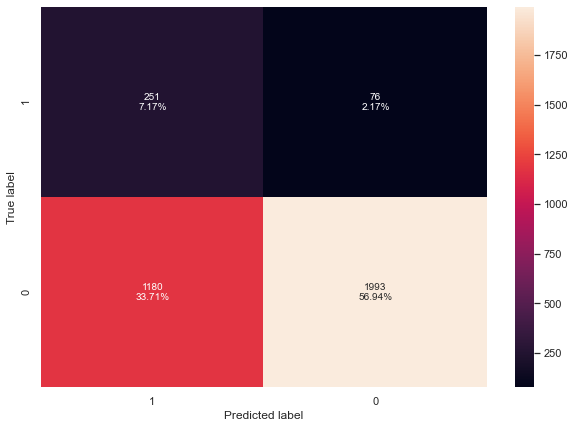

In [91]:
make_confusion_matrix(y_train,y_pred_tr )

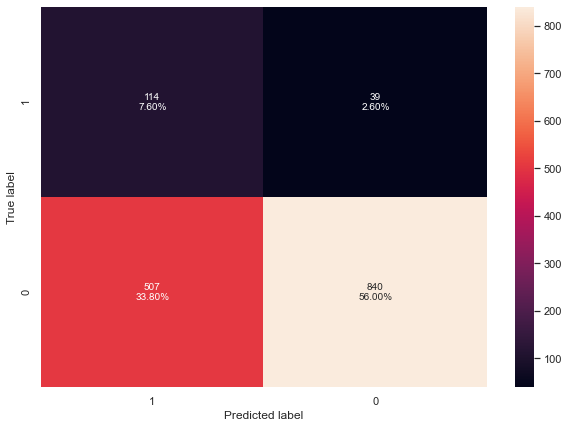

In [92]:
make_confusion_matrix(y_test,y_pred_ts)

In [93]:
#Accuracy with optimal threshold
print('Accuracy on train data:',accuracy_score(y_train,y_pred_tr) )
print('Accuracy on test data:',accuracy_score(y_test,y_pred_ts))

Accuracy on train data: 0.6411428571428571
Accuracy on test data: 0.636


 OBSERVATIONS:

* After choosing optimal threshold, the True Positives increased while our False Positives (Type 1 Error) decreased.
* However, our False Negatives (Type 2 Error) increased from 4 to 35%.
* AUC has increased however, our accuracy has significantly decreased. 
* Of the two models, the original model shows a more accurate model.

## Use Sequential Feature Selector method

In [95]:
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
from mlxtend.plotting import plot_sequential_feature_selection as plot_sfs
import matplotlib.pyplot as plt

In [96]:
## Defining X and Y variables
X = bank.drop(['Personal_Loan'], axis=1)
Y = bank[['Personal_Loan']]


X_train, X_test, y_train, y_test = train_test_split(X,
                                                    Y, test_size=0.30, stratify=Y, random_state=1, shuffle=True)

In [101]:
# Fit the model on train
m = LogisticRegression(solver='newton-cg',n_jobs=-1,random_state=1, class_weight='balanced')

In [102]:
X_train.shape

(3500, 12)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    4.5s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  12 out of  12 | elapsed:   37.2s finished

[2021-05-06 17:03:48] Features: 11/1 -- score: 0.8977142857142857[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    2.9s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  11 out of  11 | elapsed:   29.0s finished

[2021-05-06 17:04:17] Features: 10/1 -- score: 0.8982857142857142[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.3s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    2.8s finished

[2021-05-06 17:04:20] Features: 9/1 -- score: 0.8982857142857142[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   

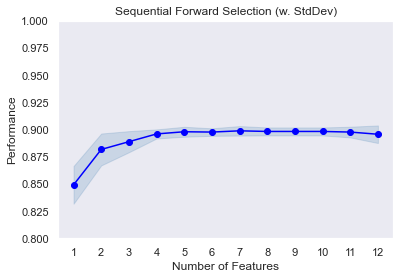

In [103]:
# Build model with all variables
sfs = SFS(m, forward=False, floating=False, scoring='accuracy', verbose=2, cv=5)

sfs = sfs.fit(X_train, y_train)

fig1 = plot_sfs(sfs.get_metric_dict(),kind='std_dev')

plt.ylim([0.8, 1])
plt.title('Sequential Forward Selection (w. StdDev)')
plt.grid()
plt.show()

In [104]:
sfs.get_metric_dict()

{12: {'feature_idx': (0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11),
  'cv_scores': array([0.88857143, 0.89857143, 0.88571429, 0.90857143, 0.89714286]),
  'avg_score': 0.8957142857142856,
  'feature_names': ('Age',
   'Experience',
   'Income',
   'ZIPCode',
   'Family',
   'CCAvg',
   'Education',
   'Mortgage',
   'Securities_Account',
   'CD_Account',
   'Online',
   'CreditCard'),
  'ci_bound': 0.010386719132944316,
  'std_dev': 0.008081220356417701,
  'std_err': 0.0040406101782088505},
 11: {'feature_idx': (0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 11),
  'cv_scores': array([0.89571429, 0.89285714, 0.89285714, 0.90428571, 0.90285714]),
  'avg_score': 0.8977142857142857,
  'feature_names': ('Age',
   'Experience',
   'Income',
   'ZIPCode',
   'Family',
   'CCAvg',
   'Education',
   'Mortgage',
   'Securities_Account',
   'CD_Account',
   'CreditCard'),
  'ci_bound': 0.0063179945954604695,
  'std_dev': 0.0049156144383100345,
  'std_err': 0.0024578072191550173},
 10: {'feature_idx': (0, 1, 2, 4, 5, 6,

OBSERVATIONS:

* After reviewing the features scores, the columns that ocurred most consistently with the highest average score are:CreditCard, CD_Account, Securities_Account, Income, Family, CCAvg, and Education. This is similiar to the results from previous logistic regression modeling. 

# Decision Tree Model Building:

## Model building preprocessing 

### Split data: 

In [105]:
X = bank.drop(['Personal_Loan'], axis=1) #Remove Personal_Loan from our X variable since it will be used for our Y variable
y = bank[['Personal_Loan']]

In [106]:
# Splitting data into training and test set:
X_train, X_test, y_train, y_test =train_test_split(X, y, test_size=0.3, random_state=1)
print(X_train.shape, X_test.shape)

(3500, 12) (1500, 12)


In [107]:
column_names = list(bank.columns)
column_names.remove('Personal_Loan')     # Keep only names of features by removing the name of target variable
feature_names = column_names
print(feature_names)

['Age', 'Experience', 'Income', 'ZIPCode', 'Family', 'CCAvg', 'Education', 'Mortgage', 'Securities_Account', 'CD_Account', 'Online', 'CreditCard']


## Build Decision Tree Model

In [108]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier(criterion='gini',class_weight={0:0.15,1:0.85},random_state=1)

In [109]:
model.fit(X_train, y_train)

DecisionTreeClassifier(class_weight={0: 0.15, 1: 0.85}, random_state=1)

In [110]:
def make_confusion_matrix(model,y_actual,labels=[1, 0]):
    '''
    model : classifier to predict values of X
    y_actual : ground truth  
    
    '''
    y_predict = model.predict(X_test)
    cm=metrics.confusion_matrix( y_actual, y_predict, labels=[0, 1])
    bank_cm = pd.DataFrame(cm, index = [i for i in ["Actual - No","Actual - Yes"]],
                  columns = [i for i in ['Predicted - No','Predicted - Yes']])
    group_counts = ["{0:0.0f}".format(value) for value in
                cm.flatten()]
    group_percentages = ["{0:.2%}".format(value) for value in
                         cm.flatten()/np.sum(cm)]
    labels = [f"{v1}\n{v2}" for v1, v2 in
              zip(group_counts,group_percentages)]
    labels = np.asarray(labels).reshape(2,2)
    plt.figure(figsize = (10,7))
    sns.heatmap(bank_cm, annot=labels,fmt='')
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

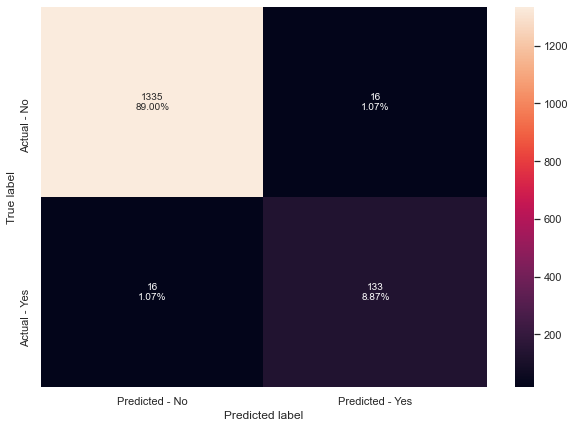

In [111]:
make_confusion_matrix(model,y_test)

 OBSERVATIONS:

* True positives for this model are much higher at 89 percent. While True negatives are down to 9 percent. 
* False Positives are at 1 percent as well as False Negatives. Those are both really good numbers.

In [112]:
##  Function to calculate recall score
def get_recall_score(model):
    '''
    model : classifier to predict values of X

    '''
    pred_train = model.predict(X_train)
    pred_test = model.predict(X_test)
    print("Recall on training set : ",metrics.recall_score(y_train,pred_train))
    print("Recall on test set : ",metrics.recall_score(y_test,pred_test))

In [113]:
get_recall_score(model)

Recall on training set :  1.0
Recall on test set :  0.8926174496644296


## Visualizing the Decision Tree: 

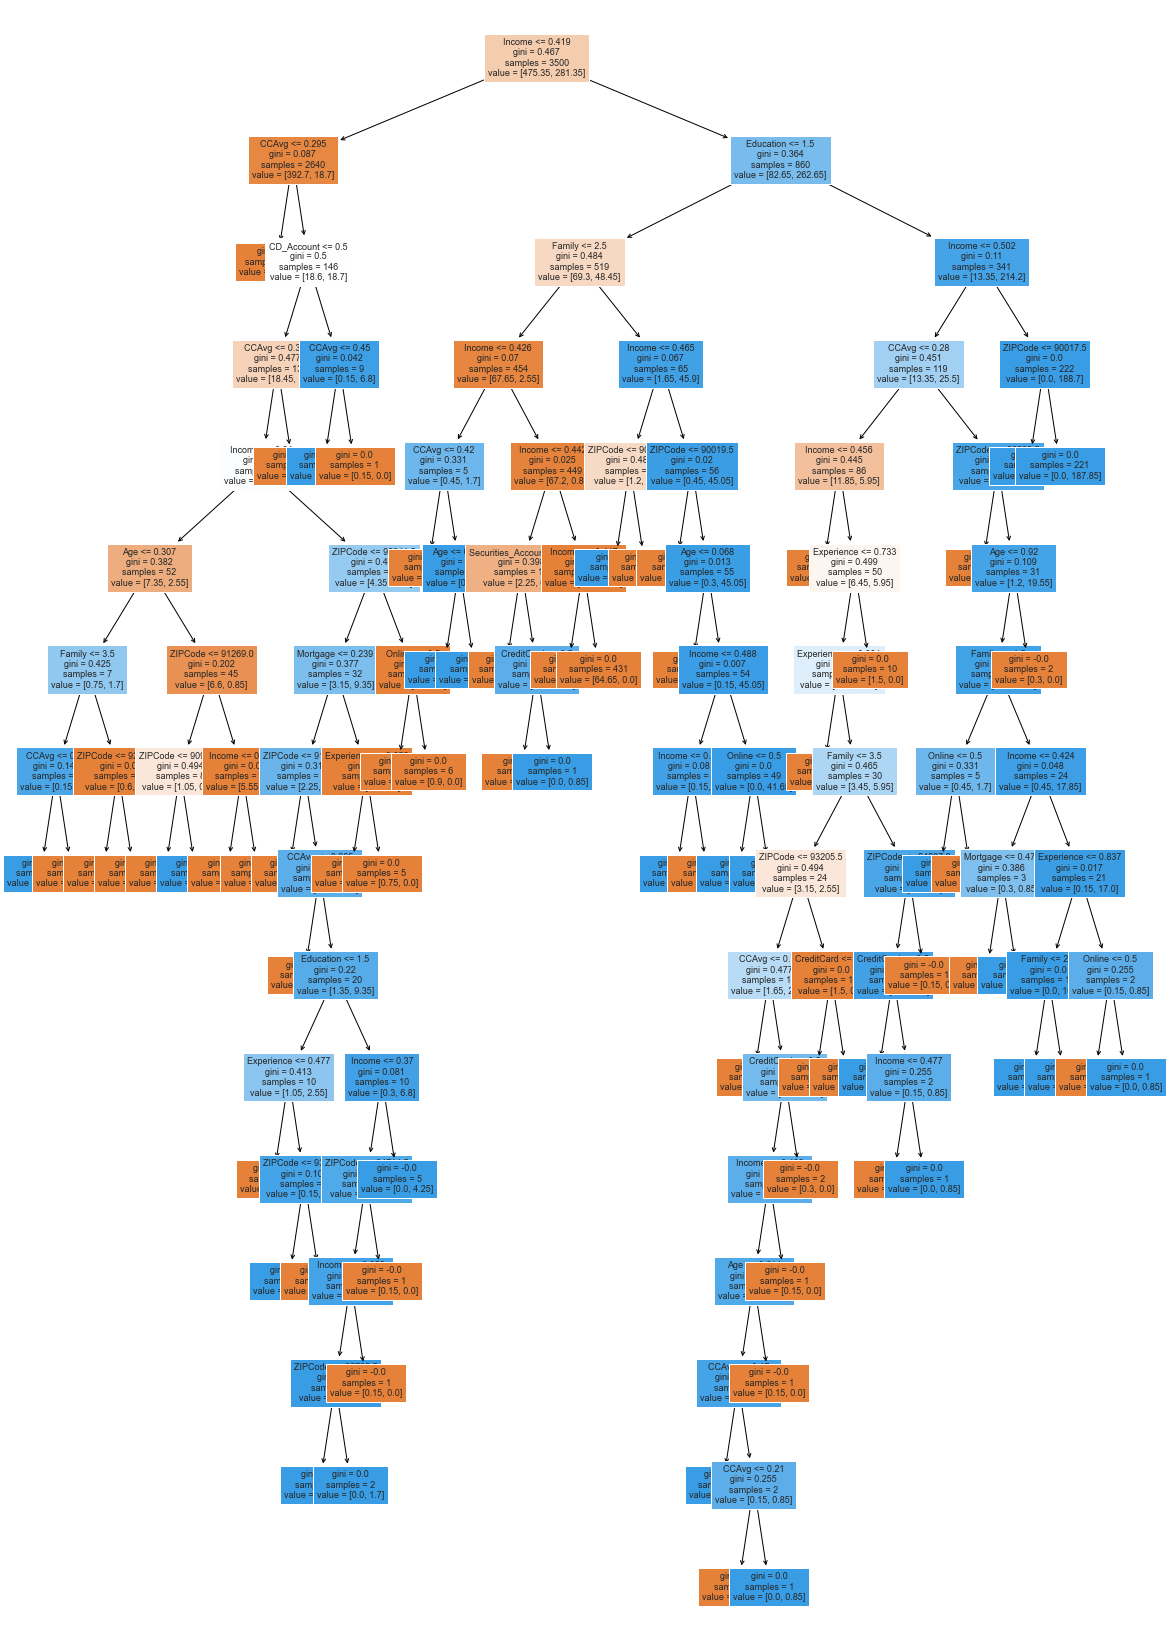

In [114]:
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier

plt.figure(figsize=(20,30))
out = tree.plot_tree(model,feature_names=feature_names,filled=True,fontsize=9,node_ids=False,class_names=None,)
#below code will add arrows to the decision tree split if they are missing
for o in out:
     arrow = o.arrow_patch
     if arrow is not None:
        arrow.set_edgecolor('black')
        arrow.set_linewidth(1)
plt.show()

In [115]:
#Report showing the results of the decision tree
print(tree.export_text(model,feature_names=feature_names,show_weights=True))

|--- Income <= 0.42
|   |--- CCAvg <= 0.30
|   |   |--- weights: [374.10, 0.00] class: 0
|   |--- CCAvg >  0.30
|   |   |--- CD_Account <= 0.50
|   |   |   |--- CCAvg <= 0.39
|   |   |   |   |--- Income <= 0.34
|   |   |   |   |   |--- Age <= 0.31
|   |   |   |   |   |   |--- Family <= 3.50
|   |   |   |   |   |   |   |--- CCAvg <= 0.35
|   |   |   |   |   |   |   |   |--- weights: [0.00, 1.70] class: 1
|   |   |   |   |   |   |   |--- CCAvg >  0.35
|   |   |   |   |   |   |   |   |--- weights: [0.15, 0.00] class: 0
|   |   |   |   |   |   |--- Family >  3.50
|   |   |   |   |   |   |   |--- ZIPCode <= 92308.50
|   |   |   |   |   |   |   |   |--- weights: [0.15, 0.00] class: 0
|   |   |   |   |   |   |   |--- ZIPCode >  92308.50
|   |   |   |   |   |   |   |   |--- weights: [0.45, 0.00] class: 0
|   |   |   |   |   |--- Age >  0.31
|   |   |   |   |   |   |--- ZIPCode <= 91269.00
|   |   |   |   |   |   |   |--- ZIPCode <= 90974.00
|   |   |   |   |   |   |   |   |--- weights: [1.05, 

In [116]:
# Importance of features in the tree building as ranked based on Gini importance.

print (pd.DataFrame(model.feature_importances_, columns = ["Imp"], index = X_train.columns).sort_values(by = 'Imp', ascending = False))

                    Imp
Income             0.59
Family             0.14
Education          0.12
CCAvg              0.08
ZIPCode            0.02
CD_Account         0.01
Experience         0.01
Age                0.01
Mortgage           0.00
Securities_Account 0.00
Online             0.00
CreditCard         0.00


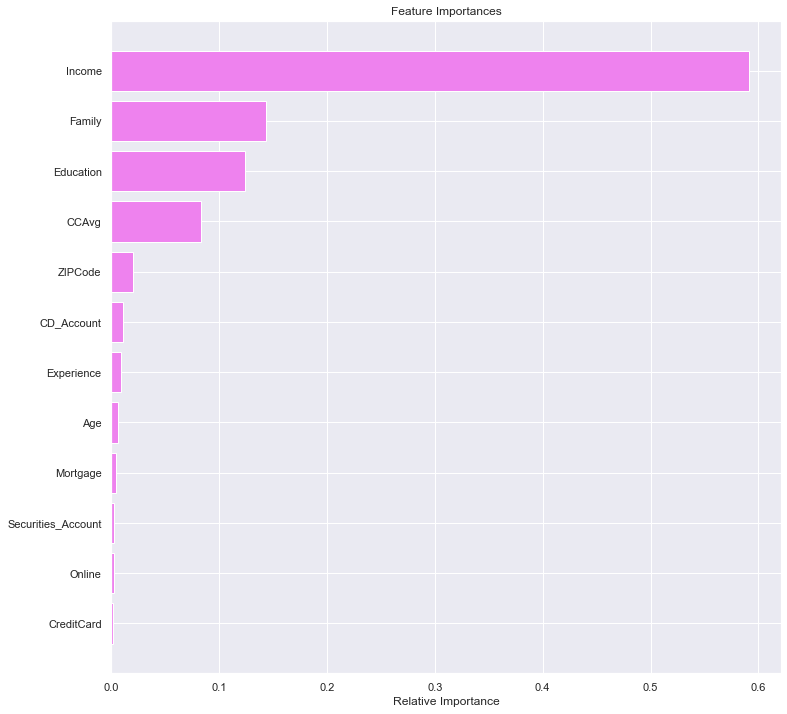

In [117]:
importances = model.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12,12))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='violet', align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

Observations:

* Based on the Gini importance, the most important feature is a client's income. This is an interesting discovery because based on logistic regression model, CD Account was ranked before income. Here, CD Account is ranked much lower. 

## Reduction of overfitting of our model 

### Use GridSearch for Hyperparameter tuning of our model:

In [118]:
from sklearn.model_selection import GridSearchCV

In [119]:
# Choose the type of classifier. 
estimator = DecisionTreeClassifier(random_state=1,class_weight = {0:.15,1:.85})

# Grid of parameters to choose from
parameters = {
            'max_depth': np.arange(1,10),
            'criterion': ['entropy','gini'],
            'splitter': ['best','random'],
            'min_impurity_decrease': [0.000001,0.00001,0.0001],
            'max_features': ['log2','sqrt']
             }

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.recall_score)

# Run the grid search
grid_obj = GridSearchCV(estimator, parameters, scoring=scorer,cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
estimator = grid_obj.best_estimator_

# Fit the best algorithm to the data. 
estimator.fit(X_train, y_train)

DecisionTreeClassifier(class_weight={0: 0.15, 1: 0.85}, criterion='entropy',
                       max_depth=6, max_features='log2',
                       min_impurity_decrease=1e-06, random_state=1)

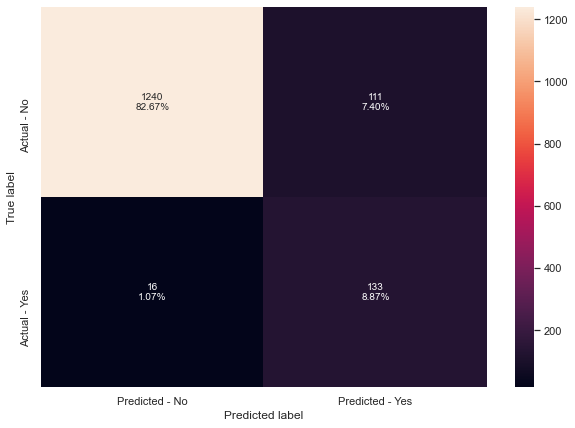

In [120]:
make_confusion_matrix(estimator,y_test)

OBSERVATIONS:

* After hyperparameter treatment, our False Positives (Type 1 Error) have jumped to 7 percent. 

In [121]:
get_recall_score(estimator)

Recall on training set :  0.9486404833836858
Recall on test set :  0.8926174496644296


 OBSERVATIONS:

* Although the recall on the training set is lower, the difference between the training and test sets has decreased.

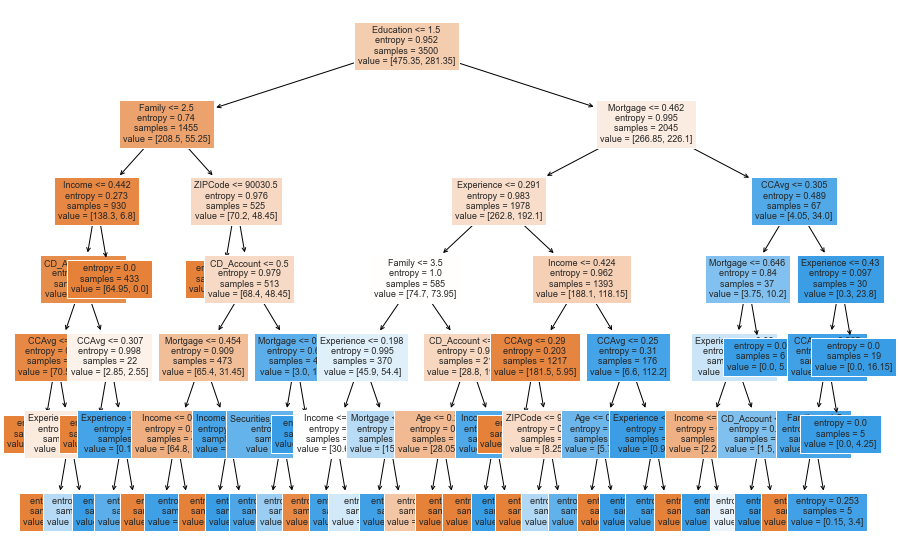

In [122]:
plt.figure(figsize=(15,10))
out = tree.plot_tree(estimator,feature_names=feature_names,filled=True,fontsize=9,node_ids=False,class_names=None)
for o in out:
    arrow = o.arrow_patch
    if arrow is not None:
        arrow.set_edgecolor('black')
        arrow.set_linewidth(1)
plt.show()

In [123]:
# Report showing the rules of a decision tree

print(tree.export_text(estimator,feature_names=feature_names,show_weights=True))

|--- Education <= 1.50
|   |--- Family <= 2.50
|   |   |--- Income <= 0.44
|   |   |   |--- CD_Account <= 0.50
|   |   |   |   |--- CCAvg <= 0.30
|   |   |   |   |   |--- weights: [65.40, 0.00] class: 0
|   |   |   |   |--- CCAvg >  0.30
|   |   |   |   |   |--- Experience <= 0.41
|   |   |   |   |   |   |--- weights: [2.40, 0.00] class: 0
|   |   |   |   |   |--- Experience >  0.41
|   |   |   |   |   |   |--- weights: [2.70, 4.25] class: 1
|   |   |   |--- CD_Account >  0.50
|   |   |   |   |--- CCAvg <= 0.31
|   |   |   |   |   |--- weights: [2.70, 0.00] class: 0
|   |   |   |   |--- CCAvg >  0.31
|   |   |   |   |   |--- Experience <= 0.62
|   |   |   |   |   |   |--- weights: [0.00, 1.70] class: 1
|   |   |   |   |   |--- Experience >  0.62
|   |   |   |   |   |   |--- weights: [0.15, 0.85] class: 1
|   |   |--- Income >  0.44
|   |   |   |--- weights: [64.95, 0.00] class: 0
|   |--- Family >  2.50
|   |   |--- ZIPCode <= 90030.50
|   |   |   |--- weights: [1.80, 0.00] class: 0
| 

In [124]:
# Importance of features in the tree building as ranked based on Gini importance.

print (pd.DataFrame(estimator.feature_importances_, columns = ["Imp"], index = X_train.columns).sort_values(by = 'Imp', ascending = False))

                    Imp
Income             0.60
CCAvg              0.10
Mortgage           0.08
Family             0.07
Education          0.06
CD_Account         0.05
Experience         0.02
ZIPCode            0.01
Age                0.01
Securities_Account 0.00
Online             0.00
CreditCard         0.00


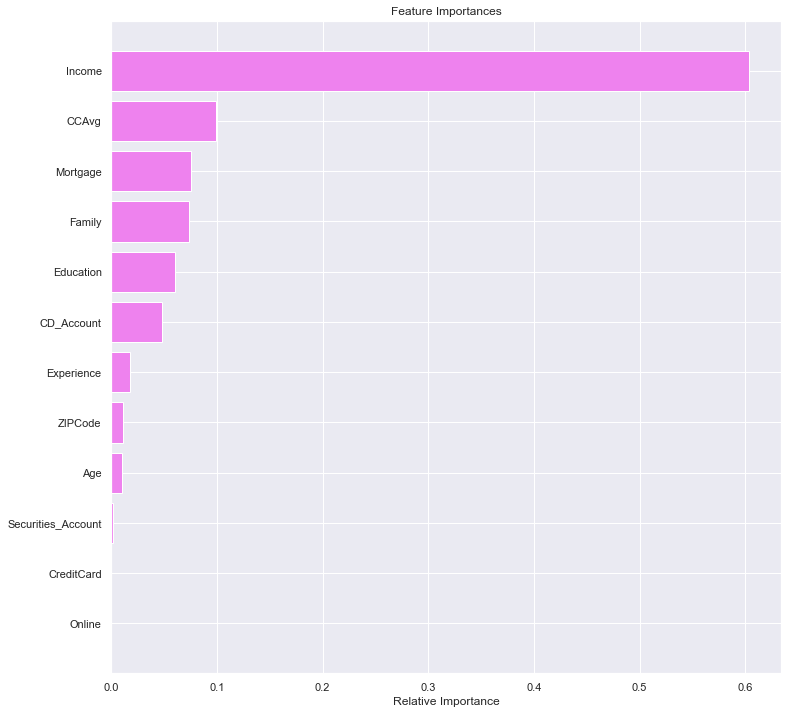

In [125]:
importances = estimator.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12,12))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='violet', align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

### Check total impurity of leaves vs. effective alphas:

In [126]:
clf = DecisionTreeClassifier(random_state=1,class_weight = {0:0.15,1:0.85})
path = clf.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas, impurities = path.ccp_alphas, path.impurities

In [149]:
pd.DataFrame(path)

,ccp_alphas,impurities
0,0.00,-0.00
1,0.00,-0.00
2,0.00,-0.00
3,0.00,-0.00
4,0.00,-0.00
5,0.00,-0.00
6,0.00,-0.00
7,0.00,-0.00
8,0.00,-0.00
9,0.00,-0.00


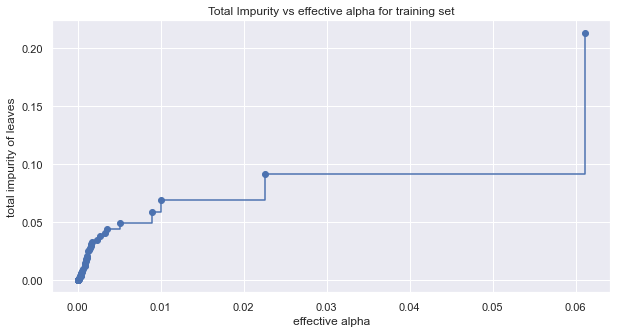

In [128]:
fig, ax = plt.subplots(figsize=(10,5))
ax.plot(ccp_alphas[:-1], impurities[:-1], marker='o', drawstyle="steps-post")
ax.set_xlabel("effective alpha")
ax.set_ylabel("total impurity of leaves")
ax.set_title("Total Impurity vs effective alpha for training set")
plt.show()

Next steps: We need to train a decision tree based on the effective alphas. 

In [129]:
clfs = []
for ccp_alpha in ccp_alphas:
    clf = DecisionTreeClassifier(random_state=1, ccp_alpha=ccp_alpha,class_weight = {0:0.15,1:0.85})
    clf.fit(X_train, y_train)
    clfs.append(clf)
print("Number of nodes in the last tree is: {} with ccp_alpha: {}".format(
      clfs[-1].tree_.node_count, ccp_alphas[-1]))

Number of nodes in the last tree is: 1 with ccp_alpha: 0.25379571489480873


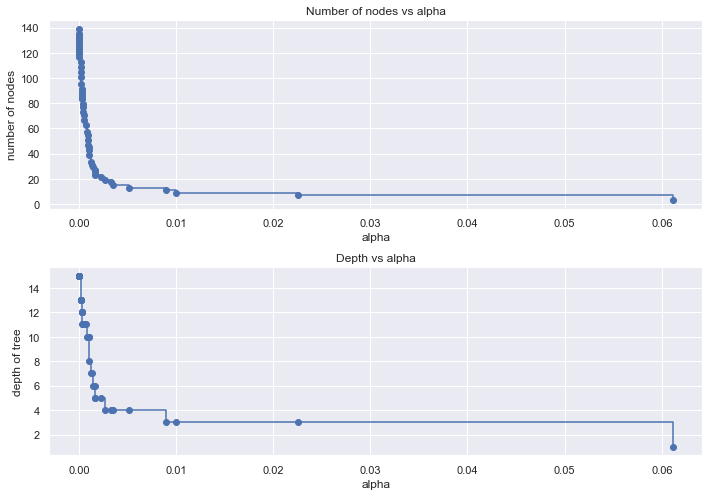

In [130]:
clfs = clfs[:-1]
ccp_alphas = ccp_alphas[:-1]

node_counts = [clf.tree_.node_count for clf in clfs]
depth = [clf.tree_.max_depth for clf in clfs]
fig, ax = plt.subplots(2, 1,figsize=(10,7))
ax[0].plot(ccp_alphas, node_counts, marker='o', drawstyle="steps-post")
ax[0].set_xlabel("alpha")
ax[0].set_ylabel("number of nodes")
ax[0].set_title("Number of nodes vs alpha")
ax[1].plot(ccp_alphas, depth, marker='o', drawstyle="steps-post")
ax[1].set_xlabel("alpha")
ax[1].set_ylabel("depth of tree")
ax[1].set_title("Depth vs alpha")
fig.tight_layout()

In the graphs above, as the alphas increase, the number of nodes and the depths of the trees decreases.

In [131]:
# Train recall
recall_train=[]
for clf in clfs:
    pred_train3=clf.predict(X_train)
    values_train=metrics.recall_score(y_train,pred_train3)
    recall_train.append(values_train)

In [132]:
# Test recall
recall_test=[]
for clf in clfs:
    pred_test3=clf.predict(X_test)
    values_test=metrics.recall_score(y_test,pred_test3)
    recall_test.append(values_test)

In [133]:
train_scores = [clf.score(X_train, y_train) for clf in clfs]
test_scores = [clf.score(X_test, y_test) for clf in clfs]

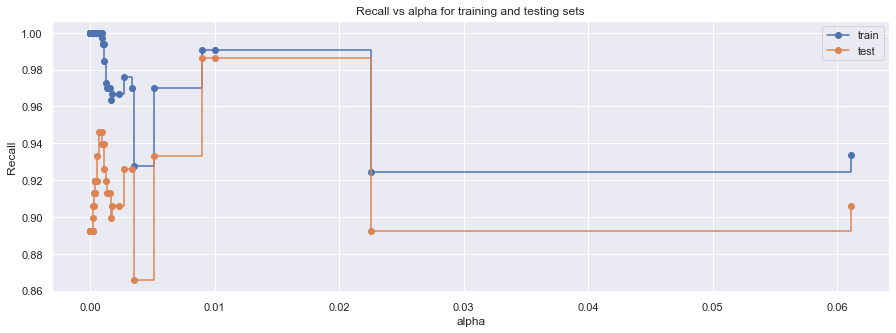

In [134]:
fig, ax = plt.subplots(figsize=(15,5))
ax.set_xlabel("alpha")
ax.set_ylabel("Recall")
ax.set_title("Recall vs alpha for training and testing sets")
ax.plot(ccp_alphas, recall_train, marker='o', label="train",
        drawstyle="steps-post",)
ax.plot(ccp_alphas, recall_test, marker='o', label="test",
        drawstyle="steps-post")
ax.legend()
plt.show()

Based on the graph above, I will choose alpha .01, where the recall is at its highest. 

In [135]:
# Creating the model with the highest train and test recall
index_best_model = np.argmax(recall_test)
best_model = clfs[index_best_model]
print(best_model)

DecisionTreeClassifier(ccp_alpha=0.009008434301508094,
                       class_weight={0: 0.15, 1: 0.85}, random_state=1)


In [136]:
best_model.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.009008434301508094,
                       class_weight={0: 0.15, 1: 0.85}, random_state=1)

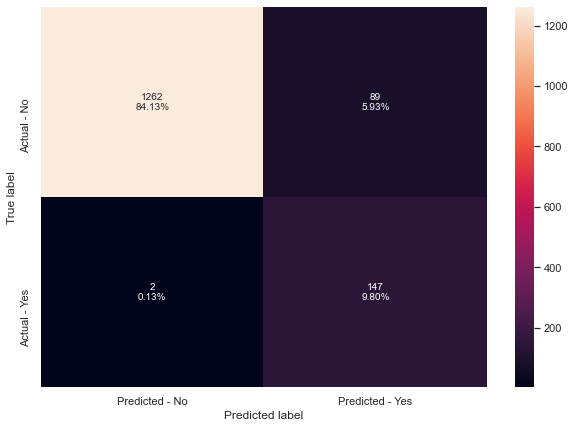

In [137]:
make_confusion_matrix(best_model,y_test)

 OBSERVATIONS:

* We now have our True Positives at 84 percent. 
* True negatives are at almost 10 percent.
* False positives are at about 6% and False negatives are a negligible .13%

In [138]:
get_recall_score(best_model)

Recall on training set :  0.9909365558912386
Recall on test set :  0.9865771812080537


The above recall scores are an improvement from previous models.

## Decision Tree visual:

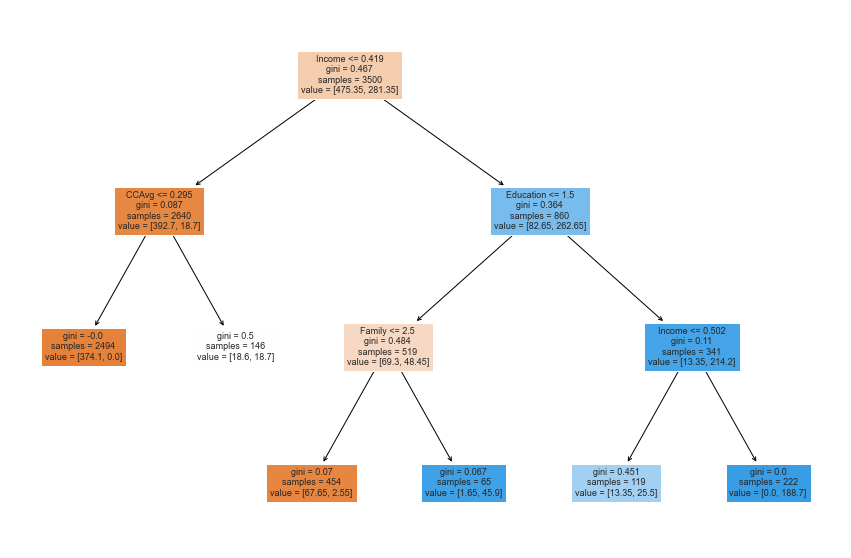

In [139]:
plt.figure(figsize=(15,10))

out = tree.plot_tree(best_model,feature_names=feature_names,filled=True,fontsize=9,node_ids=False,class_names=None)
for o in out:
    arrow = o.arrow_patch
    if arrow is not None:
        arrow.set_edgecolor('black')
        arrow.set_linewidth(1)
plt.show()

### Model 2 using .01 alphas for comparison: 

In [140]:
best_model2 = DecisionTreeClassifier(ccp_alpha=0.01,
                       class_weight={0: 0.15, 1: 0.85}, random_state=1)
best_model2.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.01, class_weight={0: 0.15, 1: 0.85},
                       random_state=1)

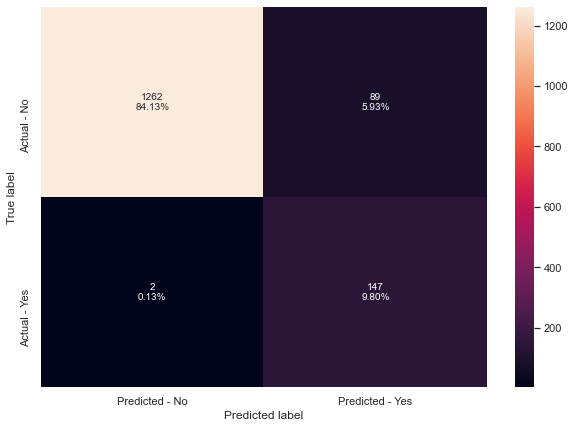

In [141]:
make_confusion_matrix(best_model2,y_test)

In [142]:
get_recall_score(best_model2)

Recall on training set :  0.9909365558912386
Recall on test set :  0.9865771812080537


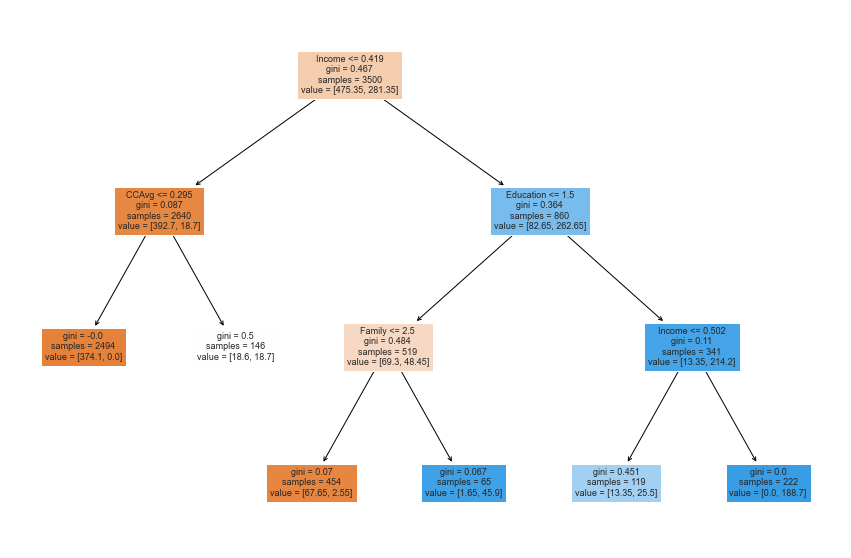

In [143]:
plt.figure(figsize=(15,10))

out = tree.plot_tree(best_model2,feature_names=feature_names,filled=True,fontsize=9,node_ids=False,class_names=None)
for o in out:
    arrow = o.arrow_patch
    if arrow is not None:
        arrow.set_edgecolor('black')
        arrow.set_linewidth(1)
plt.show()

In [144]:
# Report showing the rules of a decision tree:

print(tree.export_text(best_model2,feature_names=feature_names,show_weights=True))

|--- Income <= 0.42
|   |--- CCAvg <= 0.30
|   |   |--- weights: [374.10, 0.00] class: 0
|   |--- CCAvg >  0.30
|   |   |--- weights: [18.60, 18.70] class: 1
|--- Income >  0.42
|   |--- Education <= 1.50
|   |   |--- Family <= 2.50
|   |   |   |--- weights: [67.65, 2.55] class: 0
|   |   |--- Family >  2.50
|   |   |   |--- weights: [1.65, 45.90] class: 1
|   |--- Education >  1.50
|   |   |--- Income <= 0.50
|   |   |   |--- weights: [13.35, 25.50] class: 1
|   |   |--- Income >  0.50
|   |   |   |--- weights: [0.00, 188.70] class: 1



In [145]:
# Importance of features in the tree building as ranked based on Gini importance.

print (pd.DataFrame(best_model2.feature_importances_, columns = ["Imp"], index = X_train.columns).sort_values(by = 'Imp', ascending = False))

                    Imp
Income             0.65
Family             0.16
Education          0.14
CCAvg              0.06
Age                0.00
Experience         0.00
ZIPCode            0.00
Mortgage           0.00
Securities_Account 0.00
CD_Account         0.00
Online             0.00
CreditCard         0.00


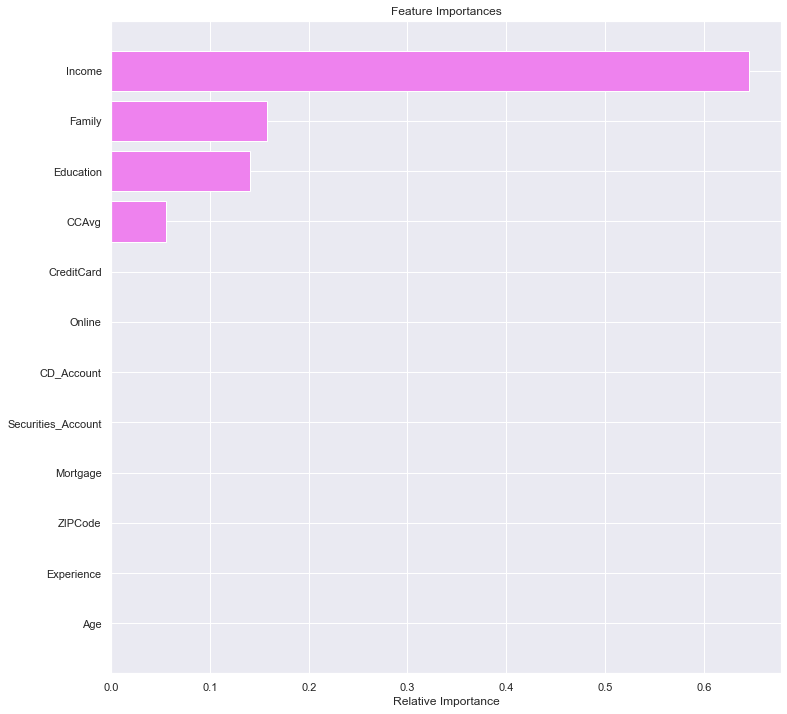

In [146]:
importances = best_model2.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12,12))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='violet', align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

OBSERVATIONS:

* Both of these models show income as having the highest importance with regard to the variables.

## Comparing the decision tree results: 

In [152]:
comparison_frame = pd.DataFrame({'Model':['Initial decision tree model','Decision tree with hyperparameter tuning',
                                          'Decision tree with post-pruning'], 'Train_Recall':[1,0.83,0.89], 'Test_Recall':[0.30,0.81,0.86]}) 
comparison_frame

,Model,Train_Recall,Test_Recall
0,Initial decision tree model,1.00,0.30
1,Decision tree with hyperparameter tuning,0.83,0.81
2,Decision tree with post-pruning,0.89,0.86


OBSERVATIONS:

*After comparing the three types of models and their performance, the best recall results are those found with the decision tree with post-pruning.

## Actionable Insights and Recommendations: 

TARGET CLIENT: 

* Your current client based on demographics from this data pool consists of an individual who is on average 45 years old, with approximately 20 years of work experience and makes 74,000 dollars a year. This client is usually single however, those with a family of 2 to 4 is also common. Close to half of the client base has at least an undergraduate degree, a large majority do not have a mortgage but on average those with a mortgage still owe 56,500. Over 90 percent do not have Securities accounts, CD accounts and 70 percent have a credit card issued by another bank. More than half are online.
* Marketing should focus on clients within a higher income bracket as seen in our Decision Tree model with post pruning. Other factors to consider would be family size and education. 

## Logistic regression vs. Decision Tree based recommendations:

Logistic regression recommendations:

* CD accounts and income were the two strongest indicators of those who would most likely accept a personal loan. This suggests that those with a higher income bracket and disposable income are good targets for marketing strategies.

Decision Tree recommendations:

* Income was the strongest indicators of those who were most likely accept a personal loan. Once again, this suggests that those in a higher income bracket and have disposable income are good targets for marketing strategies. 

## Misclassification analysis:

The model that was created using Logistic Regression, is an example of how high accuracy percents are not necessarily indicative of an accurate model. With our best model created after we addressed Multicollinearity, our accuracy percents were in the high 80's for both the train and test sets. In this project, the data has a misclassification bias with regard to several variables. For example, under the Personal_Loan column, 90 percent of clients did not accept loans in the past marketing campaign. This clearly shows a biased sample. This is true of other columns as well such as Securities_Account and CD_Account. Future research and data compiling should include some measures to include a broader audience and avoid or correct the issue. For this project, we used a weighted class weight measure of 'balanced" in hopes of correcting for this. Unfortunately, I don't believe it was enough to counteract the bias completely. 
With the Decision Tree based models, these are created in such a way that splits the data based on possible solutions of a decision. By using the Gini impurity as a criteria when using the CART method, we are able to measure how often a randomly chosen element from the set would be incorrectly labeled given the parameters of the distribution of the subset. It checks for a purity level as it goes. Based on this methodology, the models created after post pruning are the most accurate models based on this data, in my opinion. 

## Key takeaways to grow the business: 

Overall, my recommendations to grow the business:

* Target clients with a higher income bracket. They show a higher probability to accept the loan and the ability to repay it. Other factors such as family size and education could play a role. There are some indications that client's with a credit card from another bank, that have CD accounts are also good targets for marketing. By following the Decision Tree based model with post pruning, we could provide the best model as shown here. This model could be used to filter out targets for marketing.

The data also shows there could be some untapped potential that warrants additional research: 

* Zipcodes for this data group was all based out of California. Is the bank only in this state? If so, target zipcodes with higher income levels that can support the cost of living there. Are there other states then that could be considered for future growth?
* Why did so many within this data group have a zero mortgage? Have they paid off their mortgage (suggesting disposable income) or are they renting a dwelling by choice? 
* So few of those in this group had accepted loans (in the past), CD Accounts and Security accounts with the bank. I believe this has skewed the results. As mentioned above, future data collection campaigns should reach a broader audience to ensure we are truly capturing accurate observances of the client base of AllLife bank.